# Preprequisites

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sgtpy_NETGP import component, mixture, saftgammamie, database
import NET_SAFTgMie_master as NE_SAFT
from plot_isotherm_main import *
from plot_sensitivity import *
from plot_PVT import *
from misc import *

def get_time_ID():
    time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM
    return time_ID

# matplotlib parameters
# matplotlib.rcParams["figure.figsize"] = [4.0, 3.5]  # in inches
matplotlib.rcParams["mathtext.default"] = "regular"  # same as regular text
matplotlib.rcParams["font.family"] = "DejaVu Sans"  # alternative: "serif"
matplotlib.rcParams["font.size"] = 7.0
# matplotlib.rcParams["axes.titlesize"] = "small"  # relative to font.size
# matplotlib.rcParams["axes.labelsize"] = "small"  # relative to font.size
# matplotlib.rcParams["xtick.labelsize"] = "x-small"  # relative to font.size
# matplotlib.rcParams["ytick.labelsize"] = "x-small"  # relative to font.size
# matplotlib.rcParams["legend.fontsize"] = "xx-small"  # relative to font.size
matplotlib.rcParams["axes.titlesize"] = 7  
matplotlib.rcParams["axes.labelsize"] = 7  
matplotlib.rcParams["xtick.labelsize"] = 7 
matplotlib.rcParams["ytick.labelsize"] = 7 
matplotlib.rcParams["legend.fontsize"] = 7 
matplotlib.rcParams["legend.frameon"] = False
matplotlib.rcParams["grid.linestyle"] = "-."
matplotlib.rcParams["grid.linewidth"] = 0.15  # in point units
matplotlib.rcParams["figure.autolayout"] = True

# NE parameters
rho20_35C = {}
rho20_51C = {}
rho20_81C = {}
ksw_35C = {}
ksw_51C = {}
ksw_81C = {}
ksw_35C['PS'] = {}
ksw_51C['PS'] = {}
ksw_81C['PS'] = {}
ksw_35C['PMMA'] = {}
ksw_51C['PMMA'] = {}
ksw_81C['PMMA'] = {}

# From PVT
rho20_35C['PS'] = 1.042
rho20_51C['PS'] = 1.037
rho20_81C['PS'] = 1.030
rho20_35C['PMMA'] = 1.178
rho20_51C['PMMA'] = 1.174
rho20_81C['PMMA'] = 1.165
# Predicted with default parameters
ksw_35C['PS']['default'] = 0.00914
ksw_51C['PS']['default'] = 0.00728
ksw_81C['PS']['default'] = 0.00517
ksw_35C['PMMA']['default'] = 0.01705
ksw_51C['PMMA']['default'] = 0.01387
ksw_81C['PMMA']['default'] = 0.01025
# Predicted with fitted parameters
ksw_35C['PS']['fitted'] = 0.00829
ksw_51C['PS']['fitted'] = 0.00665
ksw_81C['PS']['fitted'] = 0.00474
ksw_35C['PMMA']['fitted'] = 0.01805
ksw_51C['PMMA']['fitted'] = 0.01356
ksw_81C['PMMA']['fitted'] = 0.00881

c:\Users\sieun\anaconda3\envs\sgtpyenv\lib\site-packages\sgtpy_NETGP\gammamie_mixtures\association_aux.py:76: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
c:\Users\sieun\anaconda3\envs\sgtpyenv\lib\site-packages\sgtpy_NETGP\gammamie_mixtures\association_aux.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
c:\Users\sieun\ana

# Plot style guide

Figure size:
- Standard: `figsize=(4.0, 3.5)`
- Big plot: `figsize=(5.8, 5.0)`
- Subset: `figsize=(2.3, 2.0)`
- Side-by-side plots: `figsize=(3.0, 2.5)`
- 2x1 stacked plots: `figsize=(5.0, 9.0)`

Line style:
- EQ model, fitted: `linestyle=solid`
- NE model, fitted: `linestyle=dashed`
- EQ model, default: `linestyle=dashdot`
- NE model, default: `linestyle=dotted`

# Plot exp vs. default vs. fitted at 100, 132 °C

## Save the EQ solubility

Sheets for 100C:  ['S_100C (8)']
['8']
['Pantoula 2006']
Sheets for 132C:  ['S_132C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True]

Solubility_EQ at 100°C:  [6.654442747289345e-09, 0.02846758022056113, 0.053289992890043734, 0.07249458526323936, 0.08623766255458479, 0.09658479918952237, 0.10502391101736767, 0.11226466344537532, 0.118674364167897, 0.12446725461081976]

Solubility_EQ at 132°C:  [5.1485194708807065e-09, 0.022131529391999517, 0.04215961914478343, 0.059252199374744005, 0.07323123904261376, 0.08467948966089295, 0.09436764185520838, 0.10284067951564486, 0.11042842491581713, 0.11733584604692898]
    T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  \
0      100   0.000001                 6.654443e-09   
1      100   4.432841                 2.846758e-02   
2      100   8.865680                 5.328999e-02   
3      100  13.298520                 7.249459e-02   
4      100  17.731360                 8.623766e-02   
5      100  22.164199                 9.658480e-02   
6

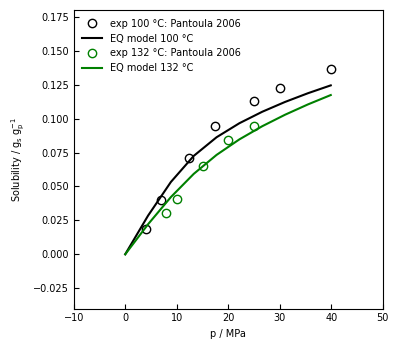

Sheets for 100C:  ['S_100C (8)']
['8']
['Pantoula 2006']
Sheets for 132C:  ['S_132C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True]

Solubility_EQ at 100°C:  [1.0532419061824325e-08, 0.043603922045763945, 0.09138901720763784, 0.1402459907256112, 0.1858518014111686, 0.22717155308638073, 0.26599194512495794, 0.3037940141543376, 0.34144534677478955, 0.37949360490696515]

Solubility_EQ at 132°C:  [8.317931929501461e-09, 0.0338589355182227, 0.07011912090109168, 0.10768807743582322, 0.14517170562265402, 0.1817279803774688, 0.21751963260012327, 0.253173342033028, 0.28928003000152863, 0.32629820409141275]
    T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  \
0      100   0.000001                 1.053242e-08   
1      100   3.897009                 4.360392e-02   
2      100   7.794016                 9.138902e-02   
3      100  11.691024                 1.402460e-01   
4      100  15.588031                 1.858518e-01   
5      100  19.485039                 2.271716e-01   
6      1

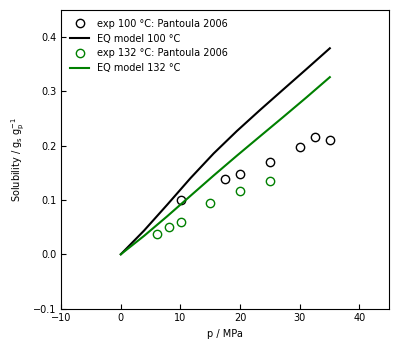

In [89]:
# Ge time_ID
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

eos_parameter_type = 'fitted'

for polymer in ['PS', 'PMMA']:
    plot_isotherm_EQvNE_multiT(
        # p_l=1,
        # p_u=25e6,
        no_p_points=60,
        T_list=[100+273, 132+273],
        sol="CO2",
        pol=polymer,
        rho20_list=[0, 0],    # irrelevant for EQ
        ksw_list=[0, 0],      # irrelevant for EQ
        xlxs_sheet_refno_list=['8'],
        include_NE=False,
        include_EQ=True,
        display_plot=False,
        # save_plot_dir=result_folder_dir + f'\\CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.svg',
        save_data_dir=f'Results\\CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_EQ_{time_ID}.csv',
    )    

## Plotting

Plot parameters.

In [38]:
T_list = [100+273, 132+273] # [K]
df_exp_CO2_PS = {}
df_exp_CO2_PMMA = {}

# Exp data for CO2-PS
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PS.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PS.xlsx').sheet_names}")
    df_exp_CO2_PS[T] = pd.read_excel('litdata/CO2-PS.xlsx', sheet_name=f'S_{T-273}C (8)')

# Exp data for CO2-PMMA
for i, T in enumerate(T_list):
    df_exp_CO2_PMMA[T] = pd.read_excel('litdata/CO2-PMMA.xlsx', sheet_name=f'S_{T-273}C (8)')
    
df_calc_CO2_PS_default = {}
df_calc_CO2_PMMA_default = {}
df_calc_CO2_PS_fitted = {}
df_calc_CO2_PMMA_fitted = {}

# Calculated EQ data for CO2-PS
for T in T_list:
    df_calc_CO2_PS_default[T] = pd.read_excel(f'Results\\CO2-PS_solubility_main.xlsx', sheet_name=f'default_{T-273}C')
    df_calc_CO2_PMMA_default[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility_main.xlsx', sheet_name=f'default_{T-273}C')
    df_calc_CO2_PS_fitted[T] = pd.read_excel(f'Results\\CO2-PS_solubility_main.xlsx', sheet_name=f'fitted_{T-273}C')
    df_calc_CO2_PMMA_fitted[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility_main.xlsx', sheet_name=f'fitted_{T-273}C')


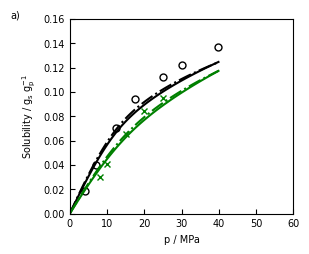

In [39]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

# Plotting CO2-PS
fig1 = plt.figure(figsize=(3.0, 2.5))
ax1 = fig1.add_subplot(111)

for i, T in enumerate(T_list):
    
    # Exp data
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with default parameters
    ax1.plot(df_calc_CO2_PS_default[T]['p [MPa]'], df_calc_CO2_PS_default[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='dashdot',
            label=f'EQ model (default) {T-273} °C')
    
    # EQ data with fitted parameters
    ax1.plot(df_calc_CO2_PS_fitted[T]['p [MPa]'], df_calc_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='solid',
            label=f'EQ model (fitted) {T-273} °C')

# Labelling
ax1.set_xlabel(r"p / MPa")
ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
update_subplot_ticks(ax1, x_lo=0., y_lo=0., y_up=0.16)

# Dynamic column number of legend
# ax1.legend(handlelength=2.6).set_visible(True)

# Add label
fig1.text(0, 0.98, 'a)', ha='left', va='top', transform=fig1.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PS_100-132C_default-fittedEoSParameters_kswFugacity_EQ_{get_time_ID()}.jpg', dpi=1200)

plt.show()


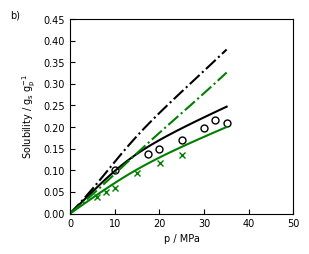

In [96]:
# Plotting CO2-PMMA
fig2 = plt.figure(figsize=(3.0, 2.5))
ax2 = fig2.add_subplot(111)

for i, T in enumerate(T_list):
    # Exp data
    ax2.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with default parameters
    ax2.plot(df_calc_CO2_PMMA_default[T]['p [MPa]'], df_calc_CO2_PMMA_default[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='dashdot',
            label=f'EQ model (default) {T-273} °C')

    # Fitted EQ data with fitted parameters
    ax2.plot(df_calc_CO2_PMMA_fitted[T]['p [MPa]'], df_calc_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='solid',
            label=f'EQ model (fitted) {T-273} °C')

# Labelling
ax2.set_xlabel(r"p / MPa")
ax2.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
update_subplot_ticks(ax2, x_lo=0., y_lo=0.)

# Dynamic column number of legend
# ax2.legend(handlelength=2.6).set_visible(True)

# Add label
fig2.text(0, 0.98, 'b)', ha='left', va='top', transform=fig2.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PMMA_100-132C_default-fittedEoSParameters_kswFugacity_EQ_{get_time_ID()}.jpg', dpi=1200)

plt.show()

Plot isotherm and density.

In [ ]:
def plot_isotherm_density_EQvNE_multiT(
    T_list: list[float],
    ksw_list: list[float],
    rho20_list: list[float],
    sol: str,
    pol: str,
    p_l: float = None,
    p_u: float = None,
    no_p_points: int = 20,
    MW2: float = None,
    xlxs_sheet_refno_list: list[str] = None,
    include_EQ: bool = True,
    include_NE: bool = True,
    display_plot: bool = True,
    save_plot_dir: str = None,
    save_data_dir: str = None,
) -> None:
    (
        _eos_mix,
        _eos_sol,
        _MW_1,
        _MW_2,
        _MW_monomer,
        _rho_2_am_dry,
        _k_sw,
    ) = NE_SAFT.get_mixture_info(sol, pol, MW2)    
    MW2 = MW2 if MW2 != None else _MW_2  # [g/mol]

    # Check T_list, ksw_list and rho20_list have the same length
    if len(T_list) != len(ksw_list) or len(T_list) != len(rho20_list):
        raise ValueError("T_list, ksw_list and rho20_list must have the same length")
    
    # Empty array to store results
    hasExpData = [None for i in range(len(T_list))]
    matched_sheets = [None for i in range(len(T_list))]
    ref_no = [None for i in range(len(T_list))]
    ref_ID = [None for i in range(len(T_list))]
    dict = {}  # dictionary of all matched sheet df
    
    # Import exp data
    for i, T in enumerate(T_list):
        try:
            # Read exp file
            path = os.path.join(os.path.dirname(__file__), "litdata")
            refpath = path + "/references.xlsx"
            databasepath = path + "/%s-%s.xlsx" % (sol, pol)
            reffile = pd.ExcelFile(refpath, engine="openpyxl")
            datafile = pd.ExcelFile(databasepath, engine="openpyxl")
            
            # Get all sheets matching T
            # print(file.sheet_names)
            matched_sheets[i] = []
            if xlxs_sheet_refno_list == None:
                search_pattern = f"^S_{T-273}C (.*)"  # strat with S_{T-273}C ()
                for sheet in datafile.sheet_names:
                    if re.search(search_pattern, sheet):
                        matched_sheets[i].append(sheet)
            elif isinstance(xlxs_sheet_refno_list, list):  # check if a list
                for j in xlxs_sheet_refno_list:
                    search_pattern = f"^S_{T-273}C.\({j}\)"
                    for sheet in datafile.sheet_names:
                        if re.search(search_pattern, sheet):
                            matched_sheets[i].append(sheet)

            print(f"Sheets for {T-273}C: ", matched_sheets[i])

            ref_no[i] = []
            for sheet in matched_sheets[i]:
                dict[sheet] = pd.read_excel(datafile, sheet)
                dict[sheet].dropna(subset=["P [MPa]"], inplace=True)
                ref_no[i].append(sheet[sheet.find("(") + 1 : sheet.find(")")])
            print(ref_no[i])

            ref_ID[i] = []
            ref_df = pd.read_excel(reffile, "references")
            # print(ref_df)
            for no in ref_no[i]:
                ref_ID[i].append(ref_df.loc[ref_df["# ref"] == f"[{no}]", "refID"].item())
                # print(ref_ID[i])
            print(ref_ID[i])
        except Exception as e:
            print("")
            print("Error - importing exp data failed:")
            print(e)
        # print(len(matched_sheets[i]))
        hasExpData[i] = True if len(matched_sheets[i]) > 0 else False
    print("hasExpData = ", hasExpData)
    
    # Empty array to store results
    solubility_EQ = [None for i in range(len(T_list))]
    solubility_NE = [None for i in range(len(T_list))]
    rho_EQ = [None for i in range(len(T_list))]
    rho_NE = [None for i in range(len(T_list))]
    
    # Get pressure range
    if p_l != None and p_u != None:
        p_calc = np.linspace(p_l, p_u, no_p_points)  # [Pa]
    else:
        for i, T in enumerate(T_list):
            if hasExpData[i] == True:
                for j, sheet in enumerate(matched_sheets[i]):
                    current_max_p_MPa = np.asarray(dict[sheet]["P [MPa]"]).max()
                    if i == 0 and j == 0:
                        max_p_MPa = current_max_p_MPa
                    else:
                        max_p_MPa = max(current_max_p_MPa, max_p_MPa)
        
        max_p = max_p_MPa * 1e6 # [Pa]
        p_calc = np.linspace(1, max_p, no_p_points)    # [Pa]
        
    p_MPa_calc = p_calc * 1e-6  # [MPa]        
        
    for i, T in enumerate(T_list):
        
        #* Calculate EQ solubility
        if include_EQ == True:
            # EQ solubility
            solubility_EQ[i] = [NE_SAFT.solve_solubility_EQ(T, p_, sol, pol, MW2) for p_ in p_calc]
            print("\nSolubility_EQ at %s°C: " % (T - 273), solubility_EQ[i])
            
            # EQ polymer partial density
            rho_EQ[i] = [NE_SAFT.solve_solubility_EQ(T, p_, sol, pol, MW2, return_extended=True)[3] for p_ in p_calc]
            print("\nDensity_EQ at %s°C: " % (T - 273), rho_EQ[i])
        
        #* Calculate NE solubility
        if include_NE == True:
            # NE solubility
            solubility_NE[i] = [NE_SAFT.solve_solubility_NE(T, p_, sol, pol, MW2, ksw_list[i], rho20_list[i]) for p_ in p_calc]
            print("\nSolubility_NE at %s°C and ksw = %g:" % (T - 273, ksw_list[i]), solubility_NE[i])
            
            # NE polymer partial density
            rho_NE[i] = [NE_SAFT.solve_solubility_NE(T, p_, sol, pol, MW2, ksw_list[i], rho20_list[i], return_extended=True)[3] for p_ in p_calc]
            print("\nDensity_NE at %s°C and ksw=%g: " % (T - 273, ksw_list[i]), rho_NE[i])

    # Save data to dataframe
    data = {
        "T [°C]": np.repeat(np.array(T_list)-273, no_p_points),
        "p [MPa]": np.tile(p_MPa_calc, len(T_list)),
        "solubility_EQ [g-sol/g-pol]": np.concatenate(solubility_EQ) if include_EQ else [None] * len(T_list) * no_p_points,
        "solubility_NE [g-sol/g-pol]": np.concatenate(solubility_NE) if include_NE else [None] * len(T_list) * no_p_points,
        "rho_pol_EQ [g-pol/cm3-pol]": np.concatenate(rho_EQ) if include_EQ else [None] * len(T_list) * no_p_points,
        "rho_pol_NE [g-pol/cm3-pol]": np.concatenate(rho_NE) if include_NE else [None] * len(T_list) * no_p_points,
    }
    
    df = pd.DataFrame(data)
    
    print(df)
    
    if save_data_dir != None:
        df.to_csv(save_data_dir, index=False)
        print(f"Data saved: {save_data_dir}")
        print("")
    
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(5.0, 9.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)
    
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    
    # Plot solubility
    for i, T in enumerate(T_list):
        # Exp solubility
        if hasExpData[i] == True:
            for j, sheet in enumerate(matched_sheets[i]):
                ax1.plot(
                    dict[sheet]["P [MPa]"],
                    dict[sheet]["Solubility [g-sol/g-pol-am]"],
                    color=NE_SAFT.custom_colours[i],
                    marker=NE_SAFT.custom_markers[j],
                    # markersize=2,
                    linestyle="None",
                    markerfacecolor="None",
                    label=f"exp {T-273} °C: {ref_ID[i][j]}",
                )
                
        # EQ solubility
        if include_EQ == True:
            ax1.plot(
                p_MPa_calc,
                solubility_EQ[i],
                color=NE_SAFT.custom_colours[i],
                marker="None",
                linestyle="dashed",
                label=f"EQ model {T-273} °C",
            )

        # NE solubility    
        if include_NE == True:
            ax1.plot(
                p_MPa_calc,
                solubility_NE[i],
                color=NE_SAFT.custom_colours[i],
                marker="None",
                linestyle="solid", 
                label=f"NE model {T-273} °C",
            )
        
    # Labelling
    ax1.set_xlabel(r"p (MPa)")
    ax1.set_ylabel(r"Solubility ($g_{sol} \; / \;g_{pol}$)")
    # ax.set_title(r"%s-%s" % (sol, pol)) 
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., y_lo=0.)
    
    # Dynamic column number of legend
    ax1.legend().set_visible(True)
    
    # Plot partial polymer density
    for i, T in enumerate(T_list):                
        # EQ calc
        ax2.plot(
            p_MPa_calc,
            rho_EQ[i],
            color=NE_SAFT.custom_colours[i],
            marker="None",            
            linestyle="dashed",
            label=f"EQ model {T-273} °C",
        )

    # NE solubility    
        ax2.plot(
            p_MPa_calc,
            rho_NE[i],
            color=NE_SAFT.custom_colours[i],
            marker="None",
            linestyle="solid",
            label=f"NE model {T-273} °C",
        )

    # Labelling
    ax2.set_xlabel(r"p (MPa)")
    ax2.set_ylabel(r"$\rho_{pol}$ ($g \; / \; cm^{-3}$)")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())
    
    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')

    if save_plot_dir != None:
        plt.savefig(save_plot_dir, dpi=1200)
        print(f"Plot saved: {save_plot_dir}")
        print("")
    
    if display_plot == True:
        plt.show()



In [7]:
eos_parameter_type = 'fitted'
for polymer in ['PS', 'PMMA']:
    plot_isotherm_density_EQvNE_multiT(
        # p_l=1,
        # p_u=25e6,
        no_p_points=5,
        T_list=[35+273],
        sol="CO2",
        pol=polymer,
        rho20_list=[rho20_35C[polymer]],
        ksw_list=[ksw_35C[polymer][eos_parameter_type]],
        xlxs_sheet_refno_list=['8'],
        include_NE=True,
        include_EQ=True,
        display_plot=True,
        # save_plot_dir=result_folder_dir + f'\\CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.svg',
        # save_data_dir=f'Results\\CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.csv',
    )    
#     plot_isotherm_density_EQvNE_multiT(
#         # p_l=1,
#         # p_u=25e6,
#         no_p_points=60,
#         T_list=[51+273],
#         sol="CO2",
#         pol=polymer,
#         rho20_list=[rho20_51C[polymer]],
#         ksw_list=[ksw_51C[polymer][eos_parameter_type]],
#         xlxs_sheet_refno_list=['8'],
#         # include_NE=True,
#         include_EQ=True,
#         display_plot=False,
#         save_plot_dir=result_folder_dir + f'\\CO2-{polymer}_51C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.svg',
#         # save_data_dir=f'Results\\CO2-{polymer}_51C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.csv',
#     )    
#     plot_isotherm_density_EQvNE_multiT(
#         # p_l=1,
#         # p_u=25e6,
#         no_p_points=60,
#         T_list=[81+273],
#         sol="CO2",
#         pol=polymer,
#         rho20_list=[rho20_81C[polymer]],
#         ksw_list=[ksw_81C[polymer][eos_parameter_type]],
#         xlxs_sheet_refno_list=['8'],
#         # include_NE=True,
#         include_EQ=True,
#         display_plot=False,
#         save_plot_dir=result_folder_dir + f'\\CO2-{polymer}_81C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.svg',
#         # save_data_dir=f'Results\\CO2-{polymer}_81C_{eos_parameter_type}EoSParameters_kswFugacity_EQvsNE_{time_ID}.csv',
# )


Error - importing exp data failed:
name '__file__' is not defined


TypeError: object of type 'NoneType' has no len()

# Plot solubility and partial polymer density at 35, 51 and 81 °C

## Importing data

In [9]:
T_list = [35+273, 51+273, 81+273] # [K]
df_exp_CO2_PS = {}
df_exp_CO2_PMMA = {}

# Exp data for CO2-PS
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PS.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PS.xlsx').sheet_names}")
    df_exp_CO2_PS[T] = pd.read_excel('litdata/CO2-PS.xlsx', sheet_name=f'S_{T-273}C (8)')

# Exp data for CO2-PMMA
for i, T in enumerate(T_list):
    df_exp_CO2_PMMA[T] = pd.read_excel('litdata/CO2-PMMA.xlsx', sheet_name=f'S_{T-273}C (8)')
    
df_CO2_PS_default = {}
df_CO2_PS_fitted = {}
df_CO2_PMMA_fitted = {}
df_CO2_PMMA_default = {}

# Calculated EQ data for CO2-PS
for T in T_list:
    df_CO2_PS_default[T] = pd.read_excel(f'Results\\CO2-PS_solubility-density_main.xlsx', sheet_name=f'default_{T-273}C')
    df_CO2_PMMA_default[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility-density_main.xlsx', sheet_name=f'default_{T-273}C')
    df_CO2_PS_fitted[T] = pd.read_excel(f'Results\\CO2-PS_solubility-density_main.xlsx', sheet_name=f'fitted_{T-273}C')
    df_CO2_PMMA_fitted[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility-density_main.xlsx', sheet_name=f'fitted_{T-273}C')


## Plotting solubiltiy and partial density together

### CO2+PS

35 C

NameError: name 'df_exp_CO2_PS' is not defined

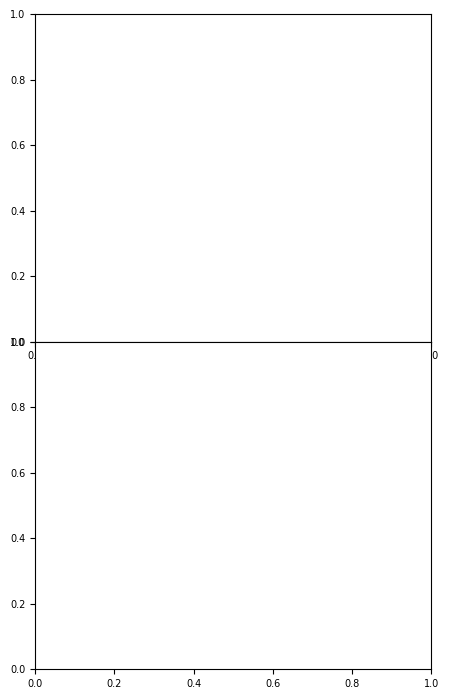

In [2]:
time_ID = get_time_ID()

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    # update_subplot_ticks(ax2, x_lo=0, 
    #                     #  y_lo=0.94, 
    #                      y_up=1.07)
    ax2.set_ylim(bottom=0.94, top=1.07)

    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{get_time_ID()}.svg', dpi=1200)
    
    # plt.show()


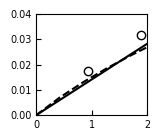

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=2, 
                         y_lo=0., y_up=0.04)

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    plt.show()


51 °C.

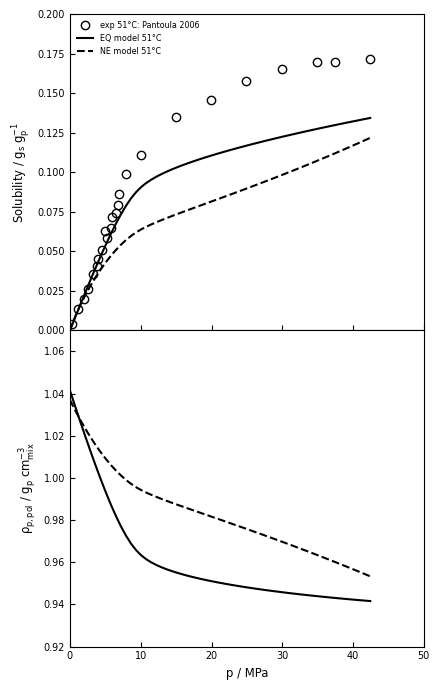

In [ ]:
time_ID = get_time_ID()

T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    ax2.set_ylim(bottom=0.92, top=1.07)

    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')
    
    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{get_time_ID()}.svg', dpi=1200)

    # plt.show()

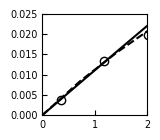

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=2.0, 
                         y_lo=0., y_up=0.025)

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    plt.show()

81 C.

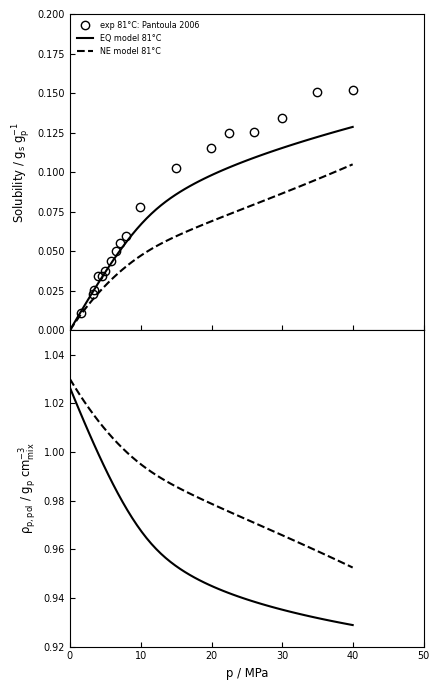

In [ ]:
time_ID = get_time_ID()

T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    ax2.set_ylim(bottom=0.92, top=1.05)

    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')
    
    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{get_time_ID()}.svg', dpi=1200)

    # plt.show()

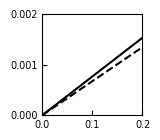

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=0.2, 
                         y_lo=0., y_up=0.002)
    
    # Set ticks manually
    ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    
    plt.show()


### CO2+PMMA

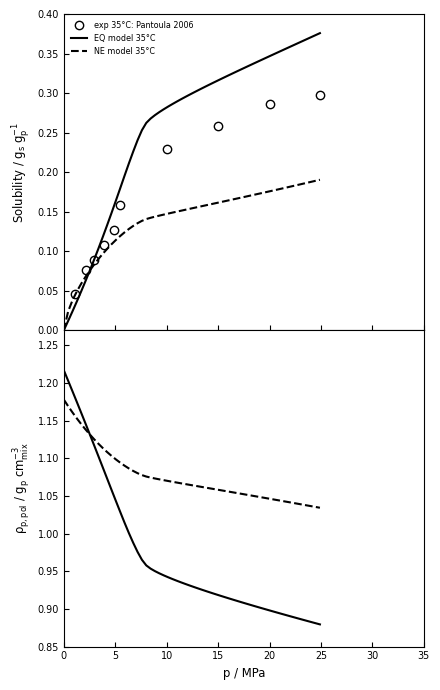

In [ ]:
time_ID = get_time_ID()

T_list=[35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.40)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    ax2.set_ylim(bottom=0.85, top=1.27)
    
    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{time_ID}.svg', dpi=1200)
    
    plt.show()

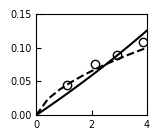

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=4.0, 
                         y_lo=0., y_up=0.15)
    
    # Set ticks manually
    # ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    
    plt.show()

51 C.

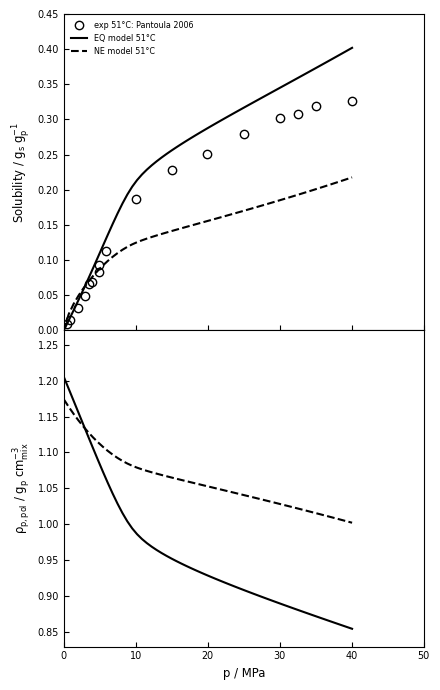

In [ ]:
time_ID = get_time_ID()

T_list=[51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.45)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    ax2.set_ylim(bottom=0.83, top=1.27)
    
    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{time_ID}.svg', dpi=1200)
    
    plt.show()

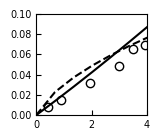

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=4.0, 
                         y_lo=0., y_up=0.10)
    
    # Set ticks manually
    # ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    
    plt.show()

81 C.

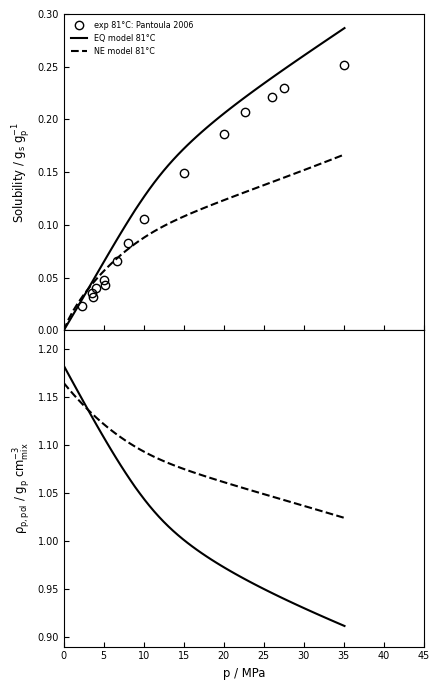

In [ ]:
time_ID = get_time_ID()

T_list=[81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(4.5, 7.0))  # Big plot
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    ax1.set_xlabel(r"p (MPa)")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., 
                         y_lo=0., y_up=0.30)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)

    # Plot partial polymer density
    # EQ calc
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax2.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model {T-273} °C",
    )

    # Labelling
    ax2.set_xlabel(r"p / MPa")
    ax2.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    ax2.set_ylim(bottom=0.89, top=1.22)
    
    # Hide x-ticks for the first plot to prevent overlap
    plt.setp(ax1.get_xticklabels(), visible=False)

    # Set the same x-ticks for both plots
    ax2.set_xticks(ax1.get_xticks())

    # Show ticks inside
    ax1.tick_params(axis='both', direction='in')
    ax2.tick_params(axis='both', direction='in')

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_{time_ID}.svg', dpi=1200)
    
    plt.show()


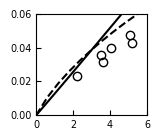

In [ ]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(1.7, 1.5))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp {T-273} °C: Pantoula 2006')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model {T-273} °C",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model {T-273} °C",
    )
    
    # Labelling
    # ax.set_xlabel(r"p (MPa)")
    # ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=6.0, 
                         y_lo=0., y_up=0.06)
    
    # Set ticks manually
    # ax.set_xticks(np.arange(0, 5, 1))

    # Set legend to upper left
    # ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.svg', dpi=1200, transparent=True)
    
    plt.show()


## Plotting solubility only 

### CO2+PS.

35 °C.

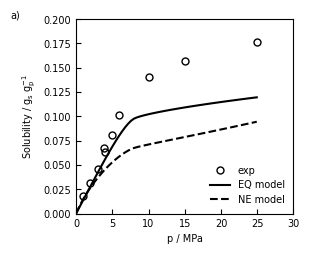

In [28]:
T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'a)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    plt.show()


51 °C.

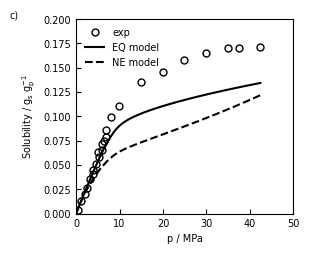

In [29]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'c)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

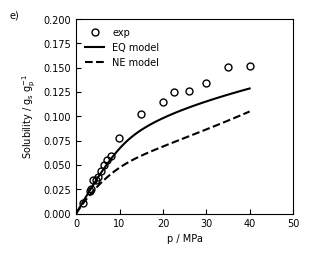

In [30]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'e)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


CO2+PMMA.

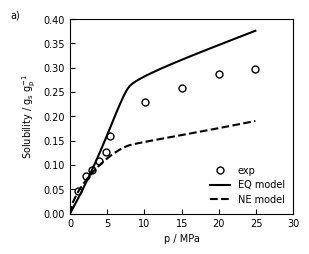

In [34]:
T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0., y_up=0.40)

    # Set legend to upper left
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'a)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


51 °C.

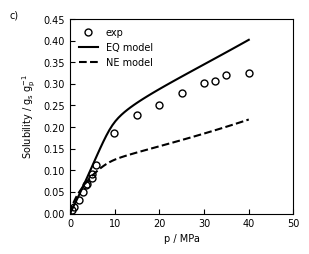

In [35]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.45)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'c)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

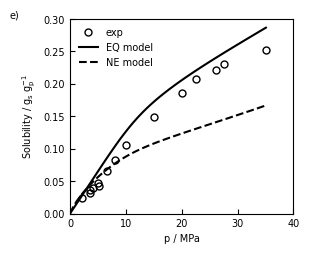

In [36]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=40,
                         y_lo=0., y_up=0.30)

    # Set legend to upper left
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'e)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    plt.show()


## Plot partial polymer density only

### CO2+PS

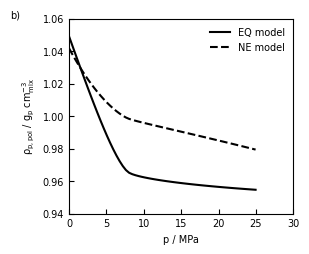

In [49]:
time_ID = get_time_ID()

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0.94, y_up=1.06)

    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'b)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


51 °C.

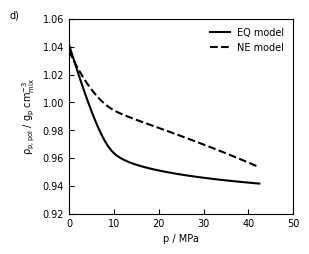

In [50]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.92, y_up=1.06)

    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'd)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

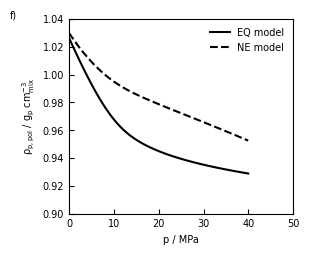

In [51]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.90, y_up=1.04)
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'f)', ha='left', va='top', transform=fig.transFigure)   
    
    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


### CO2+PMMA

35 °C.

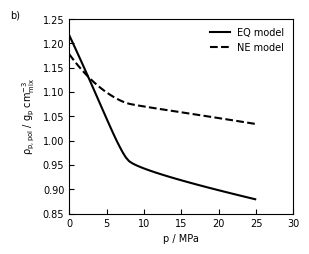

In [46]:
time_ID = get_time_ID()

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0.85, y_up=1.25)

    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0.0, 0.98, 'b)', ha='left', va='top', transform=fig.transFigure)   
    
    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    plt.show()


51 °C.

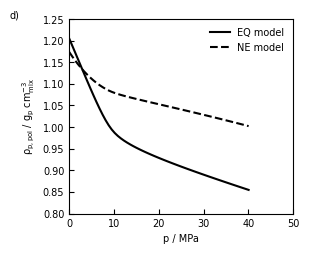

In [47]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.80, y_up=1.25)

    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'd)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

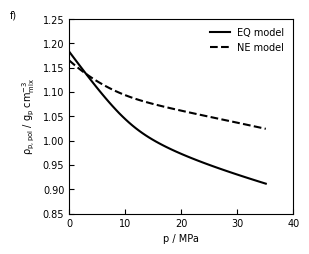

In [48]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=40,
                         y_lo=0.85, y_up=1.25)

    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'f)', ha='left', va='top', transform=fig.transFigure)   

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


## Plot zoomed-in solubility

### CO2+PS

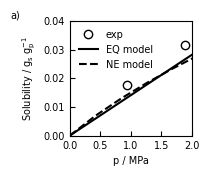

In [57]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=2, 
                         y_lo=0., y_up=0.04)

    # Set legend to upper left
    ax.legend(loc='best').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
    
    # Add label
    fig.text(0, 0.98, 'a)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    plt.show()


51 °C.

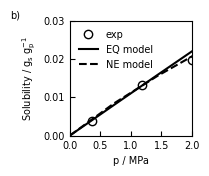

In [70]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=2.0, 
                         y_lo=0., y_up=0.03)

    # Set legend to upper left
    ax.legend(loc='upper left').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
    
    # Add label
    fig.text(0, 0.98, 'b)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    # plt.show()

81 °C.

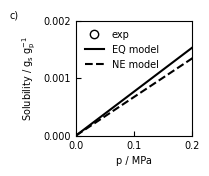

In [72]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PS_fitted[T]['p [MPa]'],
        df_CO2_PS_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=0.2, 
                         y_lo=0., y_up=0.002)
    
    # Set ticks manually
    ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    ax.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0, 0.98, 'c)', ha='left', va='top', transform=fig.transFigure)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    
    # plt.show()


### CO2+PMMA

35 °C.

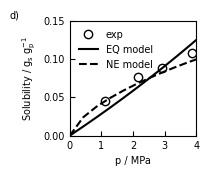

In [81]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=4.0, 
                         y_lo=0., y_up=0.15)
    
    # Set ticks manually
    # ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    ax.legend(loc='best').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
    
    # Add label
    fig.text(0, 0.98, 'd)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    
    # plt.show()

51 °C.

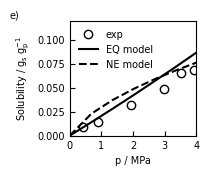

In [82]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=4.0, 
                         y_lo=0., y_up=0.12)
    
    # Set ticks manually
    # ax.set_yticks(np.arange(0, 0.0025, 0.001))

    # Set legend to upper left
    ax.legend(loc='best').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
    
    # Add label
    fig.text(0, 0.98, 'e)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_kswFugacity_solubilty-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    
    # plt.show()

81 °C.

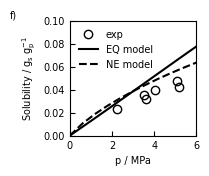

In [83]:
time_ID = datetime.now().strftime("%y%m%d-%H%M")  # YYMMDD-HHMM

T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(2.0, 1.7))  # Small plots
    ax = fig.add_subplot(111)

    # Exp solubility
    ax.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                label=f'exp')
            
    # EQ solubility
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="solid",
        label=f"EQ model",
    )

    # NE solubility    
    ax.plot(
        df_CO2_PMMA_fitted[T]['p [MPa]'],
        df_CO2_PMMA_fitted[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashed", 
        label=f"NE model",
    )
    
    # Labelling
    ax.set_xlabel(r"p / MPa")
    ax.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

    # Update ticks to cover all data points
    update_subplot_ticks(ax, x_lo=0., x_up=6.0, 
                         y_lo=0., y_up=0.10)
    
    # Set ticks manually
    # ax.set_xticks(np.arange(0, 5, 1))

    # Set legend to upper left
    ax.legend(loc='best').set_visible(True)

    # Adjust padding
    # plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
    
    # Add label
    fig.text(0, 0.98, 'f)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_fittedEoSParameters_k-density_EQvsNE_zoomed_{time_ID}.png', dpi=1200, transparent=True)
    
    # plt.show()


## Plot solubility isotherms only (default)

### CO2+PS.

35 °C.

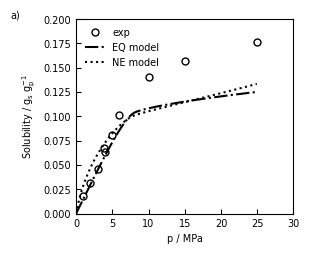

In [13]:
T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'a)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    plt.show()


51 °C.

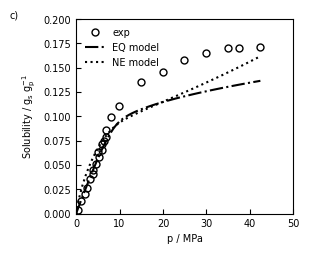

In [14]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'c)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

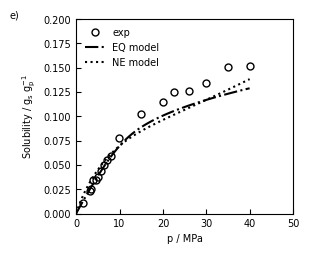

In [15]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.2)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'e)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


### CO2+PMMA

35 C.

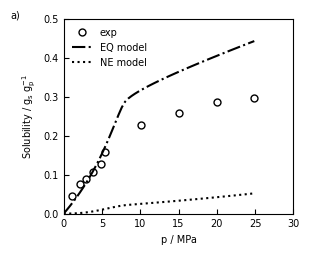

In [24]:
T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0., y_up=0.50)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'a)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    plt.show()


51 C.

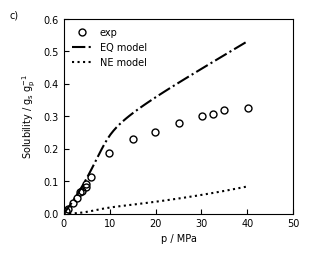

In [25]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0., y_up=0.60)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'c)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 C.

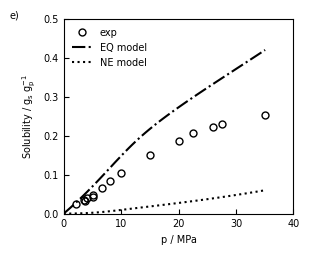

In [26]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    fig = plt.figure(figsize=(3.0, 2.5))
    ax1 = fig.add_subplot(111)

    # Plot solubility
    # Exp solubility
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
                color=NE_SAFT.custom_colours[0],
                marker=NE_SAFT.custom_markers[0],
                linestyle="None",
                markerfacecolor="None",
                markersize=5,
                label=f'exp',
                )
            
    # EQ solubility
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_EQ [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['solubility_NE [g-sol/g-pol]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted", 
        label=f"NE model",
    )
    
    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")
    # ax.set_title(r"%s-%s" % (sol, pol)) 

    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=40,
                         y_lo=0., y_up=0.50)

    # Set legend to upper left
    ax1.legend(loc='upper left').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'e)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_solubilty_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


## Plot partial polymer density only (default)

### CO2+PS

35 C.

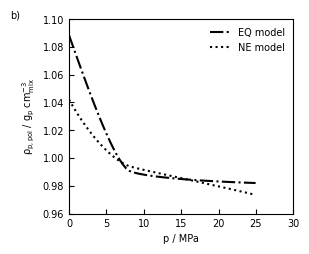

In [31]:
time_ID = get_time_ID()

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))  # Big plot

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0.96, y_up=1.1)
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'b)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


51 C.

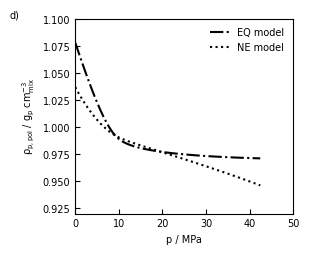

In [32]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.92, y_up=1.10)
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'd)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 C.

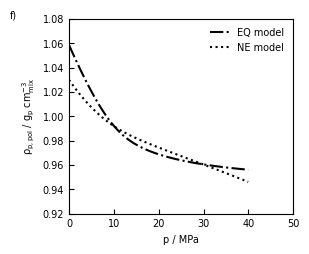

In [34]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PS_default[T]['p [MPa]'],
        df_CO2_PS_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.92, y_up=1.08)
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'f)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PS_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


### CO2+PMMA

35 °C.

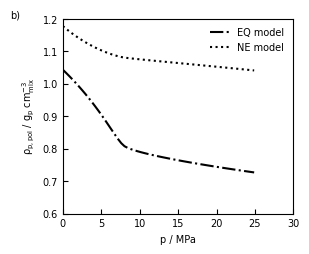

In [35]:
time_ID = get_time_ID()

T_list = [35+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=30,
                         y_lo=0.6, y_up=1.2
                         )
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'b)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


51 °C.

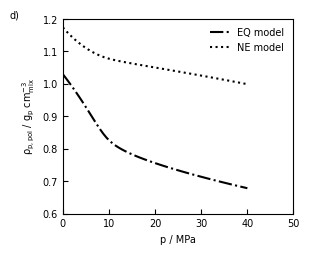

In [36]:
T_list = [51+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=50,
                         y_lo=0.60, y_up=1.2
                         )
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'd)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


81 °C.

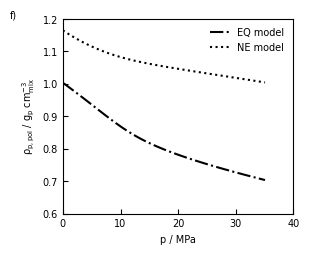

In [40]:
T_list = [81+273] # [K]

for i, T in enumerate(T_list):
    # Create a figure with 2 subplots stacked vertically, sharing the same x-axis
    fig = plt.figure(figsize=(3.0, 2.5))

    ax1 = fig.add_subplot(111)

    # Plot partial polymer density
    # EQ calc
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_EQ [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",            
        linestyle="dashdot",
        label=f"EQ model",
    )

    # NE solubility    
    ax1.plot(
        df_CO2_PMMA_default[T]['p [MPa]'],
        df_CO2_PMMA_default[T]['rho_pol_NE [g-pol/cm3-mix]'],
        color=NE_SAFT.custom_colours[0],
        marker="None",
        linestyle="dotted",
        label=f"NE model",
    )

    # Labelling
    ax1.set_xlabel(r"p / MPa")
    ax1.set_ylabel(r"$\rho_{p,pol}$ $/$ $g_{p} \; cm^{-3}_{mix}$")
    # ax2.set_title(r"%s-%s" % (sol, pol))
    
    # Update ticks to cover all data points
    update_subplot_ticks(ax1, x_lo=0., x_up=40,
                         y_lo=0.60, y_up=1.2
                         )
    
    ax1.legend(loc='best').set_visible(True)
    
    # Add label
    fig.text(0., 0.98, 'f)', ha='left', va='top', transform=fig.transFigure)

    plt.savefig(f'Anals/Paper plots/CO2-PMMA_{T-273}C_defaultEoSParameters_kswFugacity_density_EQvsNE_{get_time_ID()}.png', dpi=1200)
    
    # plt.show()


# Plot CO2 density isotherms

In [84]:
T_list = [35+273, 51+273, 81+273] # [K]

# Create SAFT-g Mie EoS object for CO2
sol_obj = component(GC={"CO2": 1})
sol_obj.saftgammamie()
eos = saftgammamie(sol_obj)
MW = 44.01  # [g/mol]

# Function to get CO2 density from SAFT-g Mie EoS
def get_rhoCO2_SAFT(T, P):
    rhoL = eos.density(T, P, "L")   # [mol/m^3]
    rhoV = eos.density(T, P, "V")   # [mol/m^3]
    if np.isclose(rhoL, rhoV):
        rho = rhoV
        # print("SC phase")
        
    elif np.isclose(P, eos.pressure(rhoV, T), rtol=1e-5):
        rho = rhoV
        # print("V phase")
        
    elif np.isclose(P, eos.pressure(rhoL,T ), rtol=1e-5):
        rho = rhoL
        # print("L phase")
    
    return rho * MW  * 1e-6  # [g/cm3]

# Import experimental data
df_CO2 = {}
for i, T in enumerate(T_list):
    df_CO2[T] = pd.read_excel('litdata/CO2.xlsx', sheet_name=f'{T-273}C (36)')


# Get max pressure value in experimental data for all T
for i, T in enumerate(T_list):    
    max_i = df_CO2[T]['Pressure (MPa)'].max()
    
    if i == 0:
        pMPa_max = max_i
    else:
        pMPa_max = max(pMPa_max, max_i)

# Get list of pressures and CO2 density from SAFT-g Mie EoS
P_list = {}
rhoCO2_SAFT = {}
for i, T in enumerate(T_list):
    #* Using fixed range
    P_list[T] = np.linspace(1, pMPa_max*1e6, 100)  # [Pa]    
    
    # SAFT prediciton
    rhoCO2_SAFT[T] = [get_rhoCO2_SAFT(T, p) for p in P_list[T]] # [g/cm3]

    print(f"Temperature: {T-273} °C")
    print(F'P_list [Pa] = {P_list[T]}')
    print(f"rhoCO2_SAFT [g/cm3] = {rhoCO2_SAFT[T]}")
    print('')

Temperature: 35 °C
P_list [Pa] = [1.00000000e+00 4.54546444e+05 9.09091889e+05 1.36363733e+06
 1.81818278e+06 2.27272822e+06 2.72727367e+06 3.18181911e+06
 3.63636456e+06 4.09091000e+06 4.54545544e+06 5.00000089e+06
 5.45454633e+06 5.90909178e+06 6.36363722e+06 6.81818267e+06
 7.27272811e+06 7.72727356e+06 8.18181900e+06 8.63636444e+06
 9.09090989e+06 9.54545533e+06 1.00000008e+07 1.04545462e+07
 1.09090917e+07 1.13636371e+07 1.18181826e+07 1.22727280e+07
 1.27272734e+07 1.31818189e+07 1.36363643e+07 1.40909098e+07
 1.45454552e+07 1.50000007e+07 1.54545461e+07 1.59090916e+07
 1.63636370e+07 1.68181824e+07 1.72727279e+07 1.77272733e+07
 1.81818188e+07 1.86363642e+07 1.90909097e+07 1.95454551e+07
 2.00000006e+07 2.04545460e+07 2.09090914e+07 2.13636369e+07
 2.18181823e+07 2.22727278e+07 2.27272732e+07 2.31818187e+07
 2.36363641e+07 2.40909096e+07 2.45454550e+07 2.50000004e+07
 2.54545459e+07 2.59090913e+07 2.63636368e+07 2.68181822e+07
 2.72727277e+07 2.77272731e+07 2.81818186e+07 2.8636

Plot successfully exported to c:\Users\sieun\OneDrive - Imperial College London\Documents\CO2 Project\3. Modelling\3.1 Solubility\3.1.3 NET SAFT-g Mie\Model\Anals\Paper plots\CO2_density_250303-1745.png.


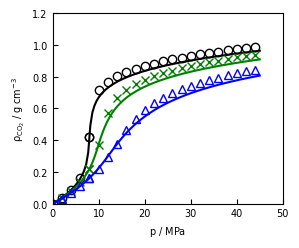

In [86]:
# Plot figure
fig = plt.figure(figsize=(3.0, 2.5))
ax = fig.add_subplot(111)
for i, T in enumerate(T_list):        
    # Exp measurement, choosing every 2nd data point for better visibility
    ax.plot(df_CO2[T]['Pressure (MPa)'][::2], df_CO2[T]["Density (mol/m3)"][::2]*MW*1e-6, 
            color=NE_SAFT.custom_colours[i], 
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            label=f'ref {T-273} °C: Span Wagner EoS')
    
    # SAFT predictions
    ax.plot(P_list[T]*1e-6, rhoCO2_SAFT[T], 
            color=NE_SAFT.custom_colours[i], 
            linestyle="solid", 
            marker="None", 
            label=f" SAFT-γ Mie EoS {T-273} °C")

# Labelling
ax.set_xlabel(r"p $/$ MPa")
ax.set_ylabel(r"$\rho_{CO_{2}}$ $/$ $g \; cm^{-3}$")
# ax.set_title("Comparison of CO2 density")
# ax.legend(loc='lower right').set_visible(True)

update_subplot_ticks(ax, x_lo=0., y_lo=0., x_up=50, y_up=1.2)

# Save figure
save_fig_path = os.path.abspath(f'Anals/Paper plots/CO2_density_{get_time_ID()}.png')
plt.savefig(save_fig_path, dpi=1200)
print(f"Plot successfully exported to {save_fig_path}.")

# Display plot
plt.show()

# Plot sensitvity vs. number of polymer repeating units

CO2+PS.

no repeating unit =  [  1.           4.02020202   7.04040404  10.06060606  13.08080808
  16.1010101   19.12121212  22.14141414  25.16161616  28.18181818
  31.2020202   34.22222222  37.24242424  40.26262626  43.28282828
  46.3030303   49.32323232  52.34343434  55.36363636  58.38383838
  61.4040404   64.42424242  67.44444444  70.46464646  73.48484848
  76.50505051  79.52525253  82.54545455  85.56565657  88.58585859
  91.60606061  94.62626263  97.64646465 100.66666667 103.68686869
 106.70707071 109.72727273 112.74747475 115.76767677 118.78787879
 121.80808081 124.82828283 127.84848485 130.86868687 133.88888889
 136.90909091 139.92929293 142.94949495 145.96969697 148.98989899
 152.01010101 155.03030303 158.05050505 161.07070707 164.09090909
 167.11111111 170.13131313 173.15151515 176.17171717 179.19191919
 182.21212121 185.23232323 188.25252525 191.27272727 194.29292929
 197.31313131 200.33333333 203.35353535 206.37373737 209.39393939
 212.41414141 215.43434343 218.45454545 221.47474747 22

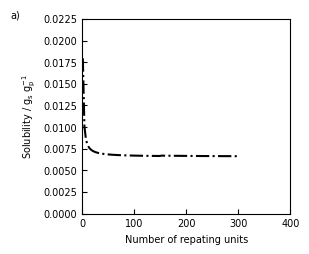

In [3]:
# Number of repeating unit sensitivity
plot_noRepeatingUnit_sensitivity_EQ_custom(no_l=1, no_u=300, no_of_points=100, 
                                    T=100+273, p=1.0e6,
                                    sol='CO2', pol='PS',
                                    x_lo=0, y_lo=0, 
                                    fig_size=(3.0, 2.5),
                                    label='a)',
                                    display_plot=False, 
                                    save_plot_dir=f'Anals/Paper plots/CO2-PS_100C_1MPa_SolubilityEQ_noRepeatingUnitSensitivity_{get_time_ID()}.png'
                                    )

CO2+PMMA.

no repeating unit =  [  1.           4.02020202   7.04040404  10.06060606  13.08080808
  16.1010101   19.12121212  22.14141414  25.16161616  28.18181818
  31.2020202   34.22222222  37.24242424  40.26262626  43.28282828
  46.3030303   49.32323232  52.34343434  55.36363636  58.38383838
  61.4040404   64.42424242  67.44444444  70.46464646  73.48484848
  76.50505051  79.52525253  82.54545455  85.56565657  88.58585859
  91.60606061  94.62626263  97.64646465 100.66666667 103.68686869
 106.70707071 109.72727273 112.74747475 115.76767677 118.78787879
 121.80808081 124.82828283 127.84848485 130.86868687 133.88888889
 136.90909091 139.92929293 142.94949495 145.96969697 148.98989899
 152.01010101 155.03030303 158.05050505 161.07070707 164.09090909
 167.11111111 170.13131313 173.15151515 176.17171717 179.19191919
 182.21212121 185.23232323 188.25252525 191.27272727 194.29292929
 197.31313131 200.33333333 203.35353535 206.37373737 209.39393939
 212.41414141 215.43434343 218.45454545 221.47474747 22

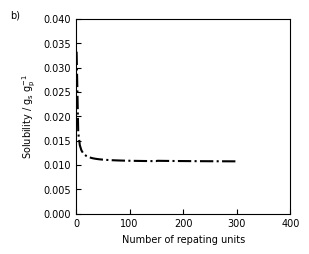

In [4]:
# Number of repeating unit sensitivity
plot_noRepeatingUnit_sensitivity_EQ_custom(no_l=1, no_u=300, no_of_points=100, 
                                T=100+273, p=1.0e6,
                                sol='CO2', pol='PMMA',
                                x_lo=0, y_lo=0, 
                                fig_size=(3.0, 2.5),
                                label='b)',
                                display_plot=False,                                        
                                save_plot_dir=f'Anals/Paper plots/CO2-PMMA_100C_1MPa_SolubilityEQ_noRepeatingUnitSensitivity_{get_time_ID()}.png'
                                )

# Plot fugacity coefficients

In [6]:
T_list = [310, 320, 350] # [K], based on exp data temperatures

# Create SAFT-g Mie EoS object for CO2
sol_obj = component(GC={"CO2": 1})
sol_obj.saftgammamie()
eos = saftgammamie(sol_obj)
MW = 44.01  # [g/mol]

# Function to get CO2 density from SAFT-g Mie EoS
def get_fugCoeff(T, p):
    
    psat, vlsat, vvsat = eos.psat(T)
    
    # Saturation Pressure (Pa), saturated liquid volume (m3/mol), saturated vapor volume (m3/mol).
    if p >= psat:  # L phase
        state_ext = 'L'
    
    else:  # V phase
        state_ext = 'V'
    
    rho_ext = eos.density(T, p, state_ext)  # [mol/m^3]
    # print("rho_1 = ", rho_1)

    # Calculate fugacity of external phase
    lnFugCoeff_ext = eos.logfug(T, p, state_ext, 1/rho_ext)[0]
    fugCoeff_ext = np.exp(lnFugCoeff_ext)
    
    return fugCoeff_ext

# Import experimental data
df_CO2 = {}
# Import from Excel file
_df = pd.read_excel('litdata/CO2.xlsx', sheet_name='fugCoeff (37)')    

# Import data as separate DataFrame for each temperature
for i, T in enumerate(T_list):    
    # Filter based on temperature
    df_CO2[T] = _df[_df['T / K'] == T]


# Get max pressure value in experimental data for all T
for i, T in enumerate(T_list):
    max_i = df_CO2[T]['p / bar'].max()
    
    if i == 0:
        pbar_max = max_i
    else:
        pbar_max = max(pbar_max, max_i)

# Get list of pressures and CO2 density from SAFT-g Mie EoS
P_list = {}
fugCoeff = {}
for i, T in enumerate(T_list):
    # Pressure range
    P_list[T] = np.linspace(1, pbar_max*1e5, 100)  # [Pa]    
    
    # SAFT prediciton
    fugCoeff[T] = [get_fugCoeff(T, p) for p in P_list[T]]

    print(f"Temperature: {T-273} °C")
    print(F'P_list [Pa] = {P_list[T]}')
    print(f"fugacity coefficient = {fugCoeff[T]}")
    print('')

Temperature: 37 °C
P_list [Pa] = [1.00000000e+00 5.05051495e+05 1.01010199e+06 1.51515248e+06
 2.02020298e+06 2.52525347e+06 3.03030397e+06 3.53535446e+06
 4.04040496e+06 4.54545545e+06 5.05050595e+06 5.55555644e+06
 6.06060694e+06 6.56565743e+06 7.07070793e+06 7.57575842e+06
 8.08080892e+06 8.58585941e+06 9.09090991e+06 9.59596040e+06
 1.01010109e+07 1.06060614e+07 1.11111119e+07 1.16161624e+07
 1.21212129e+07 1.26262634e+07 1.31313139e+07 1.36363644e+07
 1.41414149e+07 1.46464654e+07 1.51515158e+07 1.56565663e+07
 1.61616168e+07 1.66666673e+07 1.71717178e+07 1.76767683e+07
 1.81818188e+07 1.86868693e+07 1.91919198e+07 1.96969703e+07
 2.02020208e+07 2.07070713e+07 2.12121218e+07 2.17171723e+07
 2.22222228e+07 2.27272733e+07 2.32323238e+07 2.37373743e+07
 2.42424248e+07 2.47474753e+07 2.52525257e+07 2.57575762e+07
 2.62626267e+07 2.67676772e+07 2.72727277e+07 2.77777782e+07
 2.82828287e+07 2.87878792e+07 2.92929297e+07 2.97979802e+07
 3.03030307e+07 3.08080812e+07 3.13131317e+07 3.1818

In [7]:
_df.columns.tolist()

['T / K', 'p / bar', 'Fugacity coefficient', 'Unnamed: 3', 'ref']

Plot successfully exported to c:\Users\sieun\OneDrive - Imperial College London\Documents\CO2 Project\3. Modelling\3.1 Solubility\3.1.3 NET SAFT-g Mie\Model\Anals\Paper plots\CO2_fugacityCoefficient_250303-2311.png.


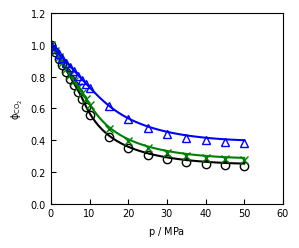

In [8]:
# Plot figure
fig = plt.figure(figsize=(3.0, 2.5))
ax = fig.add_subplot(111)
for i, T in enumerate(T_list):        
    # Exp data
    ax.plot(df_CO2[T]['p / bar']*1e-1, df_CO2[T]['Fugacity coefficient'], 
            color=NE_SAFT.custom_colours[i], 
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            label=f'ref {T-273} °C: Angus 1976')
    
    # SAFT predictions
    ax.plot(P_list[T]*1e-6, fugCoeff[T], 
            color=NE_SAFT.custom_colours[i], 
            linestyle="solid", 
            marker="None", 
            label=f" SAFT-γ Mie EoS {T-273} °C")

# Labelling
ax.set_xlabel(r"p $/$ MPa")
ax.set_ylabel(r"$\phi_{CO_{2}}$")
# ax.set_title("Comparison of CO2 density")
# ax.legend().set_visible(True)

update_subplot_ticks(ax, x_lo=0., y_lo=0., y_up=1.2, x_up=60)

# Save figure
save_fig_path = os.path.abspath(f'Anals/Paper plots/CO2_fugacityCoefficient_{get_time_ID()}.png')
plt.savefig(save_fig_path, dpi=1200)
print(f"Plot successfully exported to {save_fig_path}.")

# Display plot
plt.show()

# Plot all experimental data at 35 C

CO2+PS.

Sheets for 35C:  ['S_35C (7)', 'S_35C (23)', 'S_35C (10)', 'S_35C (22)', 'S_35C (8)']
['7', '23', '10', '22', '8']
['Wissinger 1987', 'Conforti 1996', 'Zhang 1997', 'Wong 1998', 'Pantoula 2006']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0      35   0.000001                          NaN                          NaN
1      35  24.947589                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PS_35C_allRefs_250304-1206.png



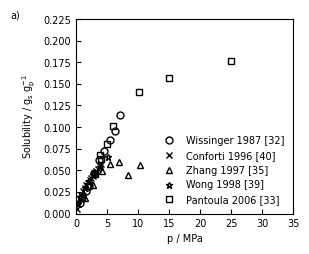

In [15]:
polymer = 'PS'
# plot_isotherm_EQvNE_multiT(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[35+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     fig_size=(5.8, 5.0),
#     x_lo=0.0, y_lo=0.0, 
#     # x_up=4.0, y_up=0.15,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[35+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['7', '23', '10', '22', '8'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    # x_up=4.0, y_up=0.15,
    label='a)',
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.png",
) 

Sheets for 35C:  ['S_35C (7)', 'S_35C (23)', 'S_35C (10)', 'S_35C (22)', 'S_35C (8)']
['7', '23', '10', '22', '8']
['Wissinger 1987', 'Conforti 1996', 'Zhang 1997', 'Wong 1998', 'Pantoula 2006']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0      35   0.000001                          NaN                          NaN
1      35  24.947589                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PS_35C_allRefs_zoomed_250304-1206.png



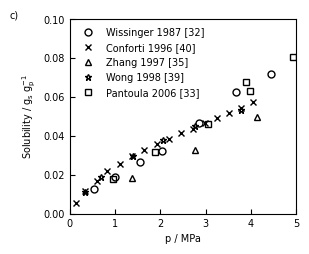

In [16]:
polymer = 'PS'
# plot_isotherm_EQvNE_multiT_zoomed(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[35+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     # fig_size=(2.3, 2.0),
#     fig_size=(2.8, 2.4),
#     x_lo=0.0, y_lo=0.0, 
#     x_up=5.0, y_up=0.10,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.svg",
# plot_isotherm_EQvNE_multiT_zoomed(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[35+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     # fig_size=(2.3, 2.0),
#     fig_size=(2.8, 2.4),
#     x_lo=0.0, y_lo=0.0, 
#     x_up=5.0, y_up=0.10,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.svg",
# )
# )
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[35+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['7', '23', '10', '22', '8'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=5.0, y_up=0.10,
    label='c)',
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_zoomed_{get_time_ID()}.png",
) 

CO2+PMMA.

Sheets for 35C:  ['S_35C (30)', 'S_35C (10)', 'S_35C (8)']
['30', '10', '8']
['Chiou 1986', 'Zhang 1997', 'Pantoula 2006']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0      35   0.000001                          NaN                          NaN
1      35  24.895616                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PMMA_35C_allRefs_250304-1207.png



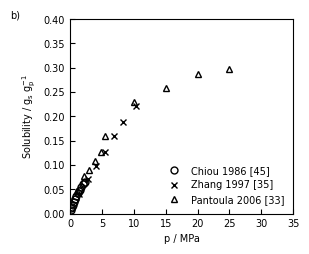

In [17]:
polymer = 'PMMA'
# plot_isotherm_EQvNE_multiT(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[35+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     fig_size=(5.8, 5.0),
#     x_lo=0.0, y_lo=0.0, 
#     # x_up=4.0, y_up=0.15,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[35+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['30', '10', '8'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    # x_up=4.0, y_up=0.15,
    legend_loc='lower right',
    display_plot=True,
    label='b)',
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.png",
) 

Sheets for 35C:  ['S_35C (30)', 'S_35C (10)', 'S_35C (8)']
['30', '10', '8']
['Chiou 1986', 'Zhang 1997', 'Pantoula 2006']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0      35   0.000001                          NaN                          NaN
1      35  24.895616                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PMMA_35C_allRefs_zoomed_250304-1207.png



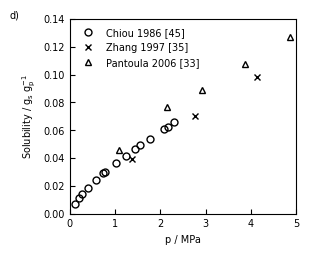

In [18]:
polymer = 'PMMA'
# plot_isotherm_EQvNE_multiT_zoomed(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[35+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     fig_size=(2.8, 2.4),
#     x_lo=0.0, y_lo=0.0, 
#     x_up=5.0, y_up=0.14,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[35+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['30', '10', '8'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=5.0, y_up=0.14,
    display_plot=True,
    label='d)',
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_35C_allRefs_zoomed_{get_time_ID()}.png",
) 

# Plot all experimental data at 100 C

CO2+PS.

Sheets for 100C:  ['S_100C (18)', 'S_100C (21)', 'S_100C (15)', 'S_100C (8)']
['18', '21', '15', '8']
['Sato 1996', 'Sato 2001', 'Vogt 2003', 'Pantoula 2006']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0     100   0.000001                          NaN                          NaN
1     100  39.895558                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PS_100C_allRefs_250304-1212.png



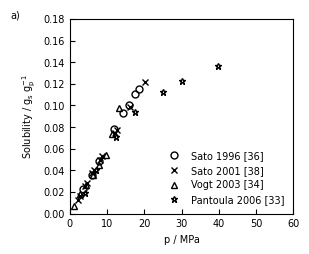

In [22]:
polymer = 'PS'
# plot_isotherm_EQvNE_multiT(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[100+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     xlxs_sheet_refno_list=None,
#     include_EQ=False,
#     include_NE=False,
#     fig_size=(5.8, 5.0),
#     x_lo=0.0, y_lo=0.0, 
#     # x_up=4.0, y_up=0.15,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_allRefs_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[100+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['18', '21', '15', '8'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    # x_up=4.0, y_up=0.15,
    legend_loc='lower right',
    label='a)',
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_allRefs_{get_time_ID()}.png",
) 

CO2+PMMA.

Sheets for 100C:  ['S_100C (29)', 'S_100C (8)', 'S_100C (4)']
['29', '8', '4']
['Edwards 1998', 'Pantoula 2006', 'Ushiki 2019']
hasExpData =  [True]
   T [°C]    p [MPa]  solubility_EQ [g-sol/g-pol]  solubility_NE [g-sol/g-pol]
0     100   0.000001                          NaN                          NaN
1     100  35.073069                          NaN                          NaN
Plot saved: Anals/Paper plots/CO2-PMMA_100C_allRefs_250304-1212.png



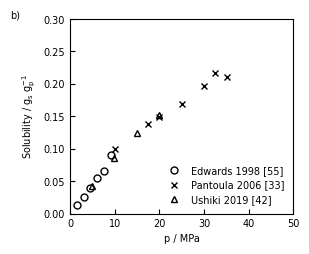

In [23]:
polymer = 'PMMA'
# plot_isotherm_EQvNE_multiT(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=2,
#     T_list=[100+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0], rho20_list=[0], # Not used for EQ only
#     # xlxs_sheet_refno_list=None,
#     xlxs_sheet_refno_list=['8', '4', '29'],
#     include_EQ=False,
#     include_NE=False,
#     fig_size=(5.8, 5.0),
#     x_lo=0.0, y_lo=0.0, 
#     # x_up=4.0, y_up=0.15,
#     display_plot=True,
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_allRefs_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom3(
    # p_l=1,
    # p_u=5e6,
    no_p_points=2,
    T_list=[100+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['29', '8', '4'],
    include_EQ=False,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    # x_up=4.0, y_up=0.15,
    legend_loc='lower right',
    label='b)',
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_allRefs_{get_time_ID()}.png",
)

# Plot common exp data at 100 C

CO2+PS.

In [ ]:
polymer = 'PS'
plot_isotherm_EQvNE_multiT(
    # p_l=1,
    # p_u=5e6,
    no_p_points=1,
    T_list=[100+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['8', '21'],
    include_EQ=False,
    include_NE=False,
    fig_size=(2.8, 2.4),
    x_lo=0.0, y_lo=0.0, 
    x_up=45.0,
    # y_up=0.15,
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_exp_PantoulaVsSato_{get_time_ID()}.svg",
) 

CO2+PMMA.

Sheets for 100C:  ['S_100C (8)', 'S_100C (4)']
['8', '4']
['Pantoula 2006', 'Ushiki 2019']
hasExpData =  [True]
   T [°C]   p [MPa] solubility_EQ [g-sol/g-pol] solubility_NE [g-sol/g-pol]
0     100  0.000001                        None                        None
Plot saved: Anals/Paper plots/CO2-PMMA_100C_exp_PantoulaVsUshiki_241202-1932.svg



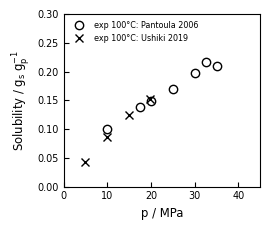

In [ ]:
polymer = 'PMMA'
plot_isotherm_EQvNE_multiT(
    # p_l=1,
    # p_u=5e6,
    no_p_points=1,
    T_list=[100+273],
    sol="CO2", pol=polymer,
    ksw_list = [0], rho20_list=[0], # Not used for EQ only
    xlxs_sheet_refno_list=['8', '4'],
    include_EQ=False,
    include_NE=False,
    fig_size=(2.8, 2.4),
    x_lo=0.0, y_lo=0.0, 
    x_up=45.0,
    # y_up=0.15,
    display_plot=True,
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_100C_exp_PantoulaVsUshiki_{get_time_ID()}.svg",
) 

# Plot pure polymer PVT: exp vs. model

## Fitted

CO2+PS.

     P (MPa)     P (Pa)  T (°C)  T (K)  V_pol (cm3/g)  rho_pol (g/cm3)  \
0          0          0   110.4  383.4         0.9847         1.015538   
1          0          0   120.0  393.0         0.9906         1.009489   
2          0          0   129.5  402.5         0.9956         1.004419   
3          0          0   139.4  412.4         1.0019         0.998104   
4          0          0   149.8  422.8         1.0075         0.992556   
..       ...        ...     ...    ...            ...              ...   
140      200  200000000   209.7  482.7         0.9461         1.056971   
141      200  200000000   219.4  492.4         0.9491         1.053630   
142      200  200000000   230.2  503.2         0.9520         1.050420   
143      200  200000000   240.2  513.2         0.9551         1.047011   
144      200  200000000   251.3  524.3         0.9580         1.043841   

     Unnamed: 6  Unnamed: 7  Unnamed: 8 primary ref  
0           NaN         NaN         NaN        [34]  
1  

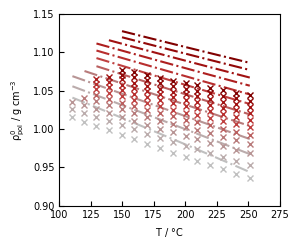

In [2]:
polymer = 'PS'
state = 'rubbery'
eos_parameter_type = 'fitted'
plot_pol_pvt_EosPrediction_custom2(pol=polymer,
                               pol_state=state,
                               x_lo=100, x_up=275,
                               y_lo=0.9, y_up=1.15,
                               fig_size=(3.0, 2.5),
                               display_plot=True,
                            #    save_plot_dir=f'Anals/Paper plots/{polymer}density_{state}_{eos_parameter_type}EoSparameters.svg',
                               )

     P (kg/cm2)        P (Pa)     P (MPa)  T (°C)   T (K)  V_pol (cm3/g)  \
0             0  0.000000e+00    0.000000   121.3  394.45         0.8711   
1             0  0.000000e+00    0.000000   130.9  404.05         0.8764   
2             0  0.000000e+00    0.000000   140.5  413.65         0.8810   
3             0  0.000000e+00    0.000000   150.1  423.25         0.8859   
4             0  0.000000e+00    0.000000   160.1  433.25         0.8914   
..          ...           ...         ...     ...     ...            ...   
106        2000  1.961361e+08  196.136118   190.4  463.55         0.8346   
107        2000  1.961361e+08  196.136118   200.2  473.35         0.8381   
108        2000  1.961361e+08  196.136118   210.4  483.55         0.8412   
109        2000  1.961361e+08  196.136118   220.6  493.75         0.8441   
110        2000  1.961361e+08  196.136118   230.4  503.55         0.8477   

     rho_pol (g/cm3)  rho_pol (kg/m3)  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0        

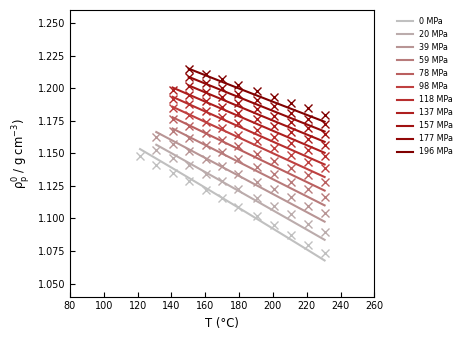

In [ ]:
polymer = 'PMMA'
state = 'rubbery'
eos_parameter_type = 'fitted'
plot_pol_pvt_EosPrediction(pol=polymer,
                           pol_state=state,
                           display_plot=True,
                           x_lo=90, 
                           #    save_plot_dir=f'Anals/Paper plots/{polymer}density_{state}_{eos_parameter_type}EoSparameters.svg',
                           )

# Plot isotherms against fitting experimental data

## Using functions

### Default parameters

CO2+PS.

Sheets for 150C:  ['S_150C (21)']
['21']
['Sato 2001']
Sheets for 200C:  ['S_200C (21)']
['21']
['Sato 2001']
hasExpData =  [True, True]

Solubility_EQ at 150°C:  [4.587974337043667e-09, 0.0015653911484897515, 0.003125254100188988, 0.004679189093807246, 0.006226849526829498, 0.007767896249428155, 0.009301992748735458, 0.010828804000638861, 0.012347996279683396, 0.013859237329543196, 0.015362196705441025, 0.016856546215452767, 0.01834196042809313, 0.01981811722932831, 0.021284698420397617, 0.022741390350459707, 0.02418788458041198, 0.025623878574656977, 0.02704907641819438, 0.028463189556206116, 0.02986593755364992, 0.03125704887123775, 0.03263626165503695, 0.03400332453524732, 0.03535799743021027, 0.03670185646256223, 0.03802927419855898, 0.03934546155485719, 0.04064842744906993, 0.04193800010365817, 0.04321402364514634, 0.044476358773661566, 0.04572488338184856, 0.046959493113985507, 0.0481801018559072, 0.049386642145982027, 0.05057906549818115, 0.051757342628149405, 0.052921463574255

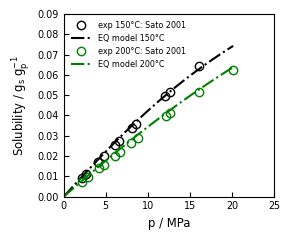

In [ ]:
polymer = 'PS'
# plot_isotherm_EQvNE_multiT_custom(
#     # p_l=1,
#     # p_u=5e6,
#     no_p_points=60,
#     T_list=[150+273, 200+273],
#     sol="CO2", pol=polymer,
#     ksw_list = [0, 0], rho20_list=[0, 0], # Not used for EQ
#     xlxs_sheet_refno_list=['8', '21'],
#     include_EQ=True,
#     include_NE=False,
#     fig_size=(3.0, 2.5),
#     x_lo=0.0, y_lo=0.0, 
#     x_up=25.0, 
#     # y_up=0.15,
#     display_plot=True,
#     save_data_dir=f"Results/CO2-{polymer}_150-200C_defaultEoSParameters_EQ_{get_time_ID()}.csv",
#     save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_150-200C_defaultEoSParameters_EQ_{get_time_ID()}.svg",
# ) 
plot_isotherm_EQvNE_multiT_custom4(
    # p_l=1,
    # p_u=5e6,
    no_p_points=5,
    T_list=[150+273, 200+273],
    sol="CO2", pol=polymer,
    ksw_list = [0, 0], rho20_list=[0, 0], # Not used for EQ
    xlxs_sheet_refno_list=['8', '21'],
    include_EQ=True,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=25.0, 
    # y_up=0.15,
    display_plot=True,
    # save_data_dir=f"Results/CO2-{polymer}_150-200C_defaultEoSParameters_EQ_{get_time_ID()}.csv",
    # save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_150-200C_defaultEoSParameters_EQ_{get_time_ID()}.svg",
) 

CO2+PMMA.

Sheets for 175C:  ['S_175C (4)']
['4']
['Ushiki 2019']
Sheets for 200C:  ['S_200C (4)']
['4']
['Ushiki 2019']
hasExpData =  [True, True]

Solubility_EQ at 175°C:  [6.674594037402849e-09, 0.0022729226301018207, 0.004560135864883142, 0.006861445184453827, 0.009176726225933239, 0.011505858646925096, 0.013848718587796816, 0.0163488400213835, 0.018575095317923562, 0.02095833160530794, 0.02335473361479476, 0.025764141956733506, 0.028186389355556066, 0.030621300632984978, 0.033068692742785885, 0.03552837485281522, 0.038000148472444005, 0.04048380762537684, 0.04297913906832886, 0.04548592255662044, 0.04800393115796892, 0.0505329316155343, 0.053072684761421025, 0.05562294598166557, 0.058183465732942044, 0.06075399011169039, 0.06333426147506346, 0.06592401911319501, 0.06852299997136355, 0.07113093942027941, 0.07374757207167934, 0.07637263263611963, 0.07900585681867156, 0.08164698224790354, 0.08429574943234204, 0.0869519027381799, 0.08961519138117184, 0.0922853704250067, 0.09496220177770207, 0.09

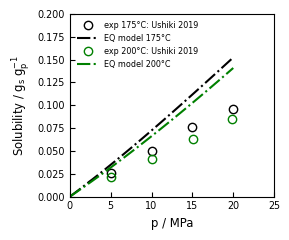

In [6]:
polymer = 'PMMA'
plot_isotherm_EQvNE_multiT_custom(
    # p_l=1,
    # p_u=5e6,
    no_p_points=60,
    T_list=[175+273, 200+273],
    sol="CO2", pol=polymer,
    ksw_list = [0, 0], rho20_list=[0, 0], # Not used for EQ
    xlxs_sheet_refno_list=['8', '4'],
    include_EQ=True,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=25.0, 
    # y_up=0.15,
    display_plot=True,
    save_data_dir=f"Results/CO2-{polymer}_175-200C_defaultEoSParameters_EQ_{get_time_ID()}.csv",
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_175-200C_defaultEoSParameters_EQ_{get_time_ID()}.svg",
)

### Fitted parameters

CO2+PS.

Sheets for 150C:  ['S_150C (21)']
['21']
['Sato 2001']
Sheets for 200C:  ['S_200C (21)']
['21']
['Sato 2001']
hasExpData =  [True, True]

Solubility_EQ at 150°C:  [4.349653723794362e-09, 0.0014843078350174526, 0.0029638508815003147, 0.004438273458292276, 0.005907270199904981, 0.007370542683189042, 0.008827794821863147, 0.010278731737386778, 0.011723059537305033, 0.013160485434524785, 0.014590718028874681, 0.016013467681951797, 0.017428446953949902, 0.01883537108746017, 0.020233958529793497, 0.02162393148838918, 0.023005016516396658, 0.024376945125302772, 0.025739454422658917, 0.027092287772527746, 0.02843519547613041, 0.02976793547054147, 0.031090274042012204, 0.03240198655106338, 0.033702858165170935, 0.03499439866101053, 0.0362712728298078, 0.0375384418644291, 0.038794023415715424, 0.04003786261766516, 0.04126981869047791, 0.04248976557500133, 0.04369759252406729, 0.04489320464247629, 0.04607652336619414, 0.04724748687217086, 0.04840605040944532, 0.04955218654324458, 0.05068588530397

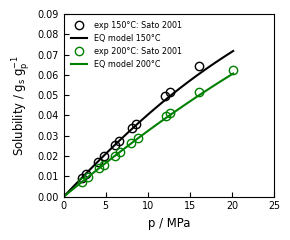

In [ ]:
polymer = 'PS'
plot_isotherm_EQvNE_multiT(
    # p_l=1,
    # p_u=5e6,
    no_p_points=60,
    T_list=[150+273, 200+273],
    sol="CO2", pol=polymer,
    ksw_list = [0, 0], rho20_list=[0, 0], # Not used for EQ
    xlxs_sheet_refno_list=['8', '21'],
    include_EQ=True,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=25.0, 
    # y_up=0.15,
    display_plot=True,
    # save_data_dir=f"Results/CO2-{polymer}_150-200C_fittedEoSParameters_EQ_{get_time_ID()}.csv",
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_150-200C_fittedEoSParameters_EQ_{get_time_ID()}.svg",
) 

CO2+PMMA.

Sheets for 175C:  ['S_175C (4)']
['4']
['Ushiki 2019']
Sheets for 200C:  ['S_200C (4)']
['4']
['Ushiki 2019']
hasExpData =  [True, True]

Solubility_EQ at 175°C:  [5.201975199810267e-09, 0.0017664191932895562, 0.003533818278862512, 0.005301895452722035, 0.0070704075302142335, 0.008839118368044527, 0.010607793203434756, 0.012482569360819123, 0.014144094415732247, 0.01591124875331952, 0.01767742296511563, 0.019442379347737283, 0.021205879860425367, 0.0229676863920318, 0.024727561061420603, 0.026485266545460528, 0.028240566431247057, 0.029993225589972125, 0.03174301057116792, 0.033489690015037814, 0.0352330350820865, 0.03697281989833221, 0.03870882201452021, 0.04044082287779931, 0.04216860831402032, 0.043891969018463074, 0.045610701052859574, 0.04732460634625818, 0.049033493196826435, 0.05073717677170732, 0.05243547960180553, 0.05412823206779668, 0.05581527287409602, 0.05749644950669879, 0.05917161867091797, 0.060840646705251314, 0.06250340996698814, 0.06415979518569576, 0.065809699780544

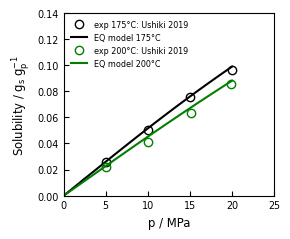

In [ ]:
polymer = 'PMMA'
plot_isotherm_EQvNE_multiT(
    # p_l=1,
    # p_u=5e6,
    no_p_points=60,
    T_list=[175+273, 200+273],
    sol="CO2", pol=polymer,
    ksw_list = [0, 0], rho20_list=[0, 0], # Not used for EQ
    xlxs_sheet_refno_list=['8', '4'],
    include_EQ=True,
    include_NE=False,
    fig_size=(3.0, 2.5),
    x_lo=0.0, y_lo=0.0, 
    x_up=25.0, 
    # y_up=0.15,
    display_plot=True,
    # save_data_dir=f"Results/CO2-{polymer}_175-200C_fittedEoSParameters_EQ_{get_time_ID()}.csv",
    save_plot_dir=f"Anals/Paper plots/CO2-{polymer}_175-200C_fittedEoSParameters_EQ_{get_time_ID()}.svg",
)

## Using exported data

### Default parameters

CO2+PS.

In [13]:
T_list = [150+273, 200+273] # [K]
df_exp_CO2_PS = {}

# Exp data for CO2-PS
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PS.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PS.xlsx').sheet_names}")
    df_exp_CO2_PS[T] = pd.read_excel('litdata/CO2-PS.xlsx', sheet_name=f'S_{T-273}C (21)')
    
df_calc_CO2_PS_default = {}

# Calculated EQ data for CO2-PS
for T in T_list:
    df_calc_CO2_PS_default[T] = pd.read_excel(f'Results\\CO2-PS_solubility_main.xlsx', sheet_name=f'default_{T-273}C')

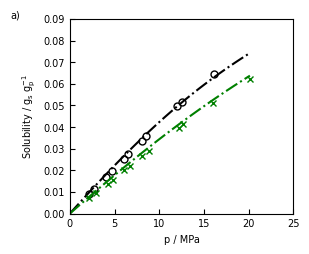

In [14]:
# Plotting CO2-PS
fig1 = plt.figure(figsize=(3.0, 2.5))
ax1 = fig1.add_subplot(111)

for i, T in enumerate(T_list):
    
    # Exp data
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with default parameters
    ax1.plot(df_calc_CO2_PS_default[T]['p [MPa]'], df_calc_CO2_PS_default[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='dashdot',
            label=f'EQ model {T-273} °C')

# Labelling
ax1.set_xlabel(r"p / MPa")
ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
# update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.10)
update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0.,)

# Dynamic column number of legend
# ax1.legend(handlelength=2.6).set_visible(True)

# Add label
fig1.text(0., 0.98, 'a)', ha='left', va='top', transform=fig1.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PS_100-132C_defaultEoSParameters_EQ_{get_time_ID()}.png', dpi=1200)

plt.show()


CO2+PMMA.

In [9]:
T_list = [175+273, 200+273] # [K]
df_exp_CO2_PMMA = {}

# Exp data for CO2-PMMA
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PMMA.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PMMA.xlsx').sheet_names}")
    df_exp_CO2_PMMA[T] = pd.read_excel('litdata/CO2-PMMA.xlsx', sheet_name=f'S_{T-273}C (4)')
    
df_calc_CO2_PMMA_default = {}

# Calculated EQ data for CO2-PMMA
for T in T_list:
    df_calc_CO2_PMMA_default[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility_main.xlsx', sheet_name=f'default_{T-273}C')

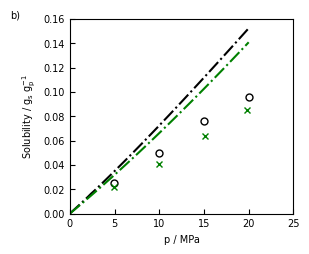

In [11]:
# Plotting CO2-PMMA
fig1 = plt.figure(figsize=(3.0, 2.5))
ax1 = fig1.add_subplot(111)

for i, T in enumerate(T_list):
    
    # Exp data
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with default parameters
    ax1.plot(df_calc_CO2_PMMA_default[T]['p [MPa]'], df_calc_CO2_PMMA_default[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='dashdot',
            label=f'EQ model {T-273} °C')

# Labelling
ax1.set_xlabel(r"p / MPa")
ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
# update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.20)
update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.16)

# Dynamic column number of legend
# ax1.legend(handlelength=2.6).set_visible(True)

# Add label
fig1.text(0., 0.98, 'b)', ha='left', va='top', transform=fig1.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PMMA_175-200C_defaultEoSParameters_EQ_{get_time_ID()}.png', dpi=1200)

plt.show()


### Fitted parameters.

CO2+PS.

In [15]:
T_list = [150+273, 200+273] # [K]
df_exp_CO2_PS = {}

# Exp data for CO2-PS
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PS.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PS.xlsx').sheet_names}")
    df_exp_CO2_PS[T] = pd.read_excel('litdata/CO2-PS.xlsx', sheet_name=f'S_{T-273}C (21)')
    
df_calc_CO2_PS_fitted = {}

# Calculated EQ data for CO2-PS
for T in T_list:
    df_calc_CO2_PS_fitted[T] = pd.read_excel(f'Results\\CO2-PS_solubility_main.xlsx', sheet_name=f'fitted_{T-273}C')

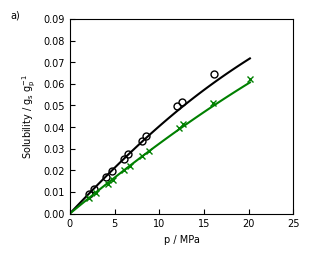

In [17]:
# Plotting CO2-PS
fig1 = plt.figure(figsize=(3.0, 2.5))
ax1 = fig1.add_subplot(111)

for i, T in enumerate(T_list):
    
    # Exp data
    ax1.plot(df_exp_CO2_PS[T]['P [MPa]'], df_exp_CO2_PS[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with fitted parameters
    ax1.plot(df_calc_CO2_PS_fitted[T]['p [MPa]'], df_calc_CO2_PS_fitted[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='solid',
            label=f'EQ model {T-273} °C')

# Labelling
ax1.set_xlabel(r"p / MPa")
ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
# update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.10)
update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0.,)

# Dynamic column number of legend
# ax1.legend(handlelength=2.6).set_visible(True)

# Add label
fig1.text(0., 0.98, 'a)', ha='left', va='top', transform=fig1.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PS_100-132C_fittedEoSParameters_kswFugacity_EQ_{get_time_ID()}.png', dpi=1200)

plt.show()


CO2+PMMA.

In [18]:
T_list = [175+273, 200+273] # [K]
df_exp_CO2_PMMA = {}

# Exp data for CO2-PMMA
for i, T in enumerate(T_list):
    # print(f"Worksheets in CO2-PMMA.xlsx for T={T-273}C: {pd.ExcelFile('litdata\\CO2-PMMA.xlsx').sheet_names}")
    df_exp_CO2_PMMA[T] = pd.read_excel('litdata/CO2-PMMA.xlsx', sheet_name=f'S_{T-273}C (4)')
    
df_calc_CO2_PMMA_fitted = {}

# Calculated EQ data for CO2-PMMA
for T in T_list:
    df_calc_CO2_PMMA_fitted[T] = pd.read_excel(f'Results\\CO2-PMMA_solubility_main.xlsx', sheet_name=f'fitted_{T-273}C')

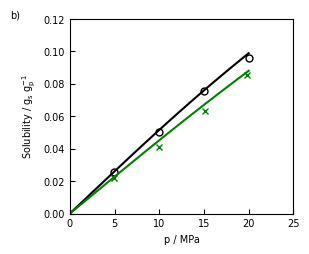

In [20]:
# Plotting CO2-PMMA
fig1 = plt.figure(figsize=(3.0, 2.5))
ax1 = fig1.add_subplot(111)

for i, T in enumerate(T_list):
    
    # Exp data
    ax1.plot(df_exp_CO2_PMMA[T]['P [MPa]'], df_exp_CO2_PMMA[T]['Solubility [g-sol/g-pol-am]'], 
            color=NE_SAFT.custom_colours[i],
            marker=NE_SAFT.custom_markers[i],
            linestyle="None",
            markerfacecolor="None",
            markersize=5,
            label=f'exp {T-273} °C: Pantoula 2006 [{paper_ref_dict["Pantoula 2006"]}]')
    
    # EQ data with default parameters
    ax1.plot(df_calc_CO2_PMMA_fitted[T]['p [MPa]'], df_calc_CO2_PMMA_fitted[T]['solubility_EQ [g-sol/g-pol]'], 
            color=NE_SAFT.custom_colours[i],
            marker='None',
            linestyle='solid',
            label=f'EQ model {T-273} °C')

# Labelling
ax1.set_xlabel(r"p / MPa")
ax1.set_ylabel(r"Solubility $/$ $g_{s} \; g^{-1}_{p}$")

# Update ticks to cover all data points
# update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.14)
update_subplot_ticks(ax1, x_lo=0., x_up=25, y_lo=0., y_up=0.12)

# Dynamic column number of legend
# ax1.legend(handlelength=2.6).set_visible(True)

# Add label
fig1.text(0., 0.98, 'b)', ha='left', va='top', transform=fig1.transFigure)

plt.savefig(f'Anals/Paper plots/CO2-PMMA_100-132C_fittedEoSParameters_kswFugacity_EQ_{get_time_ID()}.png', dpi=1200)

plt.show()


# Plot fitting of Tait equations to $\hat V_{pol}$

Rubbery PS.

T range: 30.3°C - 129.5°C
a0 = 0.949 cm^3/g
a1 = 0.000328 cm^3/g°C
a2 = -7.17e-07 cm^3/g°C^2
B0 = 355 MPa
B1 = 0.00308 °C^-1

Plot saved: Anals/Paper plots/PS_glassy_250303-2318.png



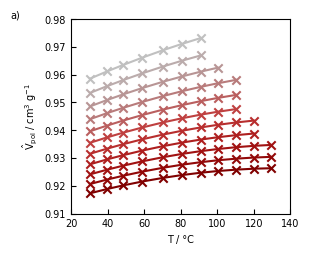

In [2]:
for pol_type in ['PS_glassy']:
    NE_SAFT.fit_polPVT_multiTait_custom(pol_type, 
                                        x_lo=20.0, x_up=140.0, 
                                        y_lo=0.91, y_up=0.98,
                                        fig_size=(3.0, 2.5),
                                        label='a)',
                                        display_plot=True,
                                        save_plot_dir=f'Anals/Paper plots/{pol_type}_{get_time_ID()}.png'
                                        )

T range: 110.4°C - 251.3°C
a0 = 0.919 cm^3/g
a1 = 0.000582 cm^3/g°C
a2 = 2.89e-08 cm^3/g°C^2
B0 = 267 MPa
B1 = 0.00423 °C^-1

Plot saved: Anals/Paper plots/PS_rubbery_250303-2320.png



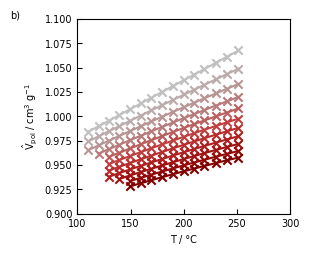

In [6]:
for pol_type in ['PS_rubbery']:
    NE_SAFT.fit_polPVT_multiTait_custom(pol_type, 
                                        x_lo=100.0, x_up=300.0, 
                                        y_lo=0.90, y_up=1.1,
                                        fig_size=(3.0, 2.5),
                                        label='b)',
                                        display_plot=True,
                                        save_plot_dir=f'Anals/Paper plots/{pol_type}_{get_time_ID()}.png'
                                        )

T range: 30.0°C - 140.5°C
a0 = 0.843 cm^3/g
a1 = 0.000165 cm^3/g°C
a2 = 4.14e-07 cm^3/g°C^2
B0 = 405 MPa
B1 = 0.00457 °C^-1

Plot saved: Anals/Paper plots/PMMA_glassy_250303-2320.png



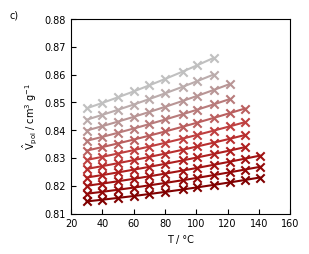

In [7]:
for pol_type in ['PMMA_glassy']:
    NE_SAFT.fit_polPVT_multiTait_custom(pol_type, 
                                        x_lo=20.0, x_up=160.0, 
                                        y_lo=0.81, y_up=0.88,
                                        fig_size=(3.0, 2.5),
                                        label='c)',
                                        display_plot=True,
                                        save_plot_dir=f'Anals/Paper plots/{pol_type}_{get_time_ID()}.png'
                                        )

T range: 121.3°C - 230.4°C
a0 = 0.822 cm^3/g
a1 = 0.000339 cm^3/g°C
a2 = 5.92e-07 cm^3/g°C^2
B0 = 316 MPa
B1 = 0.00448 °C^-1

Plot saved: Anals/Paper plots/PMMA_rubbery_250303-2320.png



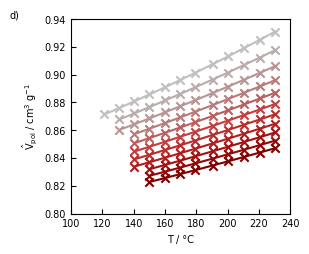

In [8]:
for pol_type in ['PMMA_rubbery']:
    NE_SAFT.fit_polPVT_multiTait_custom(pol_type, 
                                        x_lo=100.0, x_up=240.0, 
                                        y_lo=0.80, y_up=0.94,
                                        fig_size=(3.0, 2.5),
                                        display_plot=True,
                                        label='d)',
                                        save_plot_dir=f'Anals/Paper plots/{pol_type}_{get_time_ID()}.png'
                                        )

# Calculate AAD%

## Fitting of EQ model to experimental solubility data

CO2+PS at 150 and 200 °C with fitted EQ model.

In [4]:
eos_parameter_type = 'fitted'
polymer = 'PS'
get_AAD_EQ_NE_multiT([150+273, 200+273], 
                    rho20_list=[0, 0], ksw_list=[0, 0],    # Not neeeded for EQ model
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=False,
                    xlxs_sheet_refno_list=['21'],                    
                    save_data_dir=f"Results/CO2-{polymer}_150-200C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 150C:  ['S_150C (21)']
['21']
['Sato 2001']
Sheets for 200C:  ['S_200C (21)']
['21']
['Sato 2001']
hasExpData =  [True, True]
T = 150 C, Excel sheet = S_150C (21),  AAD% EQ: 2.4342004672807565%
T = 200 C, Excel sheet = S_200C (21),  AAD% EQ: 1.6394133095786954%
    T / °C  Excel sheet     ref_ID  p / MPa  solubility_exp / g_sol g_pol^-1  \
0      150  S_150C (21)  Sato 2001    2.159                          0.00904   
1      150  S_150C (21)  Sato 2001    2.689                          0.01130   
2      150  S_150C (21)  Sato 2001    4.073                          0.01709   
3      150  S_150C (21)  Sato 2001    4.732                          0.01981   
4      150  S_150C (21)  Sato 2001    6.049                          0.02532   
5      150  S_150C (21)  Sato 2001    6.530                          0.02742   
6      150  S_150C (21)  Sato 2001    8.071                          0.03380   
7      150  S_150C (21)  Sato 2001    8.566                          0.03588   
8      

CO2+PMMA at 175 and 200 °C with fitted EQ model.

In [5]:
eos_parameter_type = 'fitted'
polymer = 'PMMA'
get_AAD_EQ_NE_multiT([175+273, 200+273], 
                    rho20_list=[0, 0], ksw_list=[0, 0],    # Not neeeded for EQ model
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=False,
                    xlxs_sheet_refno_list=['4'],                    
                    save_data_dir=f"Results/CO2-{polymer}_175-200C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 175C:  ['S_175C (4)']
['4']
['Ushiki 2019']
Sheets for 200C:  ['S_200C (4)']
['4']
['Ushiki 2019']
hasExpData =  [True, True]
T = 175 C, Excel sheet = S_175C (4),  AAD% EQ: 1.9615387175137857%
T = 200 C, Excel sheet = S_200C (4),  AAD% EQ: 5.534152459810497%
   T / °C Excel sheet       ref_ID    p / MPa  \
0     175  S_175C (4)  Ushiki 2019   4.985444   
1     175  S_175C (4)  Ushiki 2019  10.007278   
2     175  S_175C (4)  Ushiki 2019  14.992722   
3     175  S_175C (4)  Ushiki 2019  20.014556   
4     200  S_200C (4)  Ushiki 2019   4.985444   
5     200  S_200C (4)  Ushiki 2019  10.007278   
6     200  S_200C (4)  Ushiki 2019  15.101892   
7     200  S_200C (4)  Ushiki 2019  19.868996   

   solubility_exp / g_sol g_pol^-1  solubility_NE / g_sol g_pol^-1  \
0                         0.025397                             NaN   
1                         0.050216                             NaN   
2                         0.075902                             NaN   
3       

## EQ solubility at 100 and 132 °C

CO2+PS at 100 and 132 °C with fitted EQ model.

In [6]:
eos_parameter_type = 'fitted'
polymer = 'PS'
get_AAD_EQ_NE_multiT([100+273, 132+273], 
                    rho20_list=[0, 0], ksw_list=[0, 0],    # Not neeeded for EQ model
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=False,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_100-132C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 100C:  ['S_100C (8)']
['8']
['Pantoula 2006']
Sheets for 132C:  ['S_132C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True]
T = 100 C, Excel sheet = S_100C (8),  AAD% EQ: 11.921859786179713%
T = 132 C, Excel sheet = S_132C (8),  AAD% EQ: 10.052033201499997%
    T / °C Excel sheet         ref_ID    p / MPa  \
0      100  S_100C (8)  Pantoula 2006   3.972902   
1      100  S_100C (8)  Pantoula 2006   7.015322   
2      100  S_100C (8)  Pantoula 2006  12.431737   
3      100  S_100C (8)  Pantoula 2006  17.436530   
4      100  S_100C (8)  Pantoula 2006  24.973554   
5      100  S_100C (8)  Pantoula 2006  29.981554   
6      100  S_100C (8)  Pantoula 2006  39.895558   
7      132  S_132C (8)  Pantoula 2006   7.999132   
8      132  S_132C (8)  Pantoula 2006  10.011045   
9      132  S_132C (8)  Pantoula 2006  15.015693   
10     132  S_132C (8)  Pantoula 2006  19.969926   
11     132  S_132C (8)  Pantoula 2006  24.977780   

    solubility_exp / g_sol g_pol^-1  solubility_

CO2+PMMA at 100 and 132 °C with fitted EQ model.

In [7]:
eos_parameter_type = 'fitted'
polymer = 'PMMA'
get_AAD_EQ_NE_multiT([100+273, 132+273], 
                    rho20_list=[0, 0], ksw_list=[0, 0],    # Not neeeded for EQ model
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=False,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_100-132C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 100C:  ['S_100C (8)']
['8']
['Pantoula 2006']
Sheets for 132C:  ['S_132C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True]
T = 100 C, Excel sheet = S_100C (8),  AAD% EQ: 11.804754051764547%
T = 132 C, Excel sheet = S_132C (8),  AAD% EQ: 13.987758011907095%
    T / °C Excel sheet         ref_ID    p / MPa  \
0      100  S_100C (8)  Pantoula 2006  10.020877   
1      100  S_100C (8)  Pantoula 2006  17.484342   
2      100  S_100C (8)  Pantoula 2006  19.989562   
3      100  S_100C (8)  Pantoula 2006  25.052192   
4      100  S_100C (8)  Pantoula 2006  30.062630   
5      100  S_100C (8)  Pantoula 2006  32.567850   
6      100  S_100C (8)  Pantoula 2006  35.073069   
7      132  S_132C (8)  Pantoula 2006   6.061416   
8      132  S_132C (8)  Pantoula 2006   8.081888   
9      132  S_132C (8)  Pantoula 2006  10.101993   
10     132  S_132C (8)  Pantoula 2006  15.024397   
11     132  S_132C (8)  Pantoula 2006  20.048412   
12     132  S_132C (8)  Pantoula 2006  25.071693 

## EQ and NE solubility at 100 and 132 °C

CO2+PS at 35, 51 and 81 °C with fitted EQ and NE models.

In [10]:
eos_parameter_type = 'fitted'
polymer = 'PS'
get_AAD_EQ_NE_multiT([35+273, 51+273, 81+273], 
                    rho20_list=[rho20_35C[polymer], rho20_51C[polymer], rho20_81C[polymer]], 
                    ksw_list=[ksw_35C[polymer][eos_parameter_type], ksw_51C[polymer][eos_parameter_type], ksw_81C[polymer][eos_parameter_type]],
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=True,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_35-51-81C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 35C:  ['S_35C (8)']
['8']
['Pantoula 2006']
Sheets for 51C:  ['S_51C (8)']
['8']
['Pantoula 2006']
Sheets for 81C:  ['S_81C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True, True]
T = 35 C, Excel sheet = S_35C (8),  AAD% EQ: 20.51858825695256%
T = 35 C, ref sheet = S_35C (8),  AAD% NE: 34.17528950629609%
T = 51 C, Excel sheet = S_51C (8),  AAD% EQ: 13.424639886975823%
T = 51 C, ref sheet = S_51C (8),  AAD% NE: 28.08002826446614%
T = 81 C, Excel sheet = S_81C (8),  AAD% EQ: 9.979973033538908%
T = 81 C, ref sheet = S_81C (8),  AAD% NE: 30.805653536986345%
    T / °C Excel sheet         ref_ID    p / MPa  \
0       35   S_35C (8)  Pantoula 2006   0.943396   
1       35   S_35C (8)  Pantoula 2006   1.886792   
2       35   S_35C (8)  Pantoula 2006   3.039832   
3       35   S_35C (8)  Pantoula 2006   3.878407   
4       35   S_35C (8)  Pantoula 2006   3.983229   
5       35   S_35C (8)  Pantoula 2006   4.926625   
6       35   S_35C (8)  Pantoula 2006   5.974843   
7     

CO2+PMMA at 35, 51 and 81 °C with fitted EQ and NE models.

In [11]:
eos_parameter_type = 'fitted'
polymer = 'PMMA'
get_AAD_EQ_NE_multiT([35+273, 51+273, 81+273], 
                    rho20_list=[rho20_35C[polymer], rho20_51C[polymer], rho20_81C[polymer]], 
                    ksw_list=[ksw_35C[polymer][eos_parameter_type], ksw_51C[polymer][eos_parameter_type], ksw_81C[polymer][eos_parameter_type]],
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=True,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_35-51-81C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 35C:  ['S_35C (8)']
['8']
['Pantoula 2006']
Sheets for 51C:  ['S_51C (8)']
['8']
['Pantoula 2006']
Sheets for 81C:  ['S_81C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True, True, True]
T = 35 C, Excel sheet = S_35C (8),  AAD% EQ: 18.8203286248625%
T = 35 C, ref sheet = S_35C (8),  AAD% NE: 21.36953893496203%
T = 51 C, Excel sheet = S_51C (8),  AAD% EQ: 18.343550460568782%
T = 51 C, ref sheet = S_51C (8),  AAD% NE: 34.823914583242065%
T = 81 C, Excel sheet = S_81C (8),  AAD% EQ: 24.146257965702585%
T = 81 C, ref sheet = S_81C (8),  AAD% NE: 26.918121925332745%
    T / °C Excel sheet         ref_ID    p / MPa  \
0       35   S_35C (8)  Pantoula 2006   1.096033   
1       35   S_35C (8)  Pantoula 2006   2.139875   
2       35   S_35C (8)  Pantoula 2006   2.922756   
3       35   S_35C (8)  Pantoula 2006   3.862213   
4       35   S_35C (8)  Pantoula 2006   4.853862   
5       35   S_35C (8)  Pantoula 2006   5.427975   
6       35   S_35C (8)  Pantoula 2006  10.073069   
7    

CO2+PS at 35 °C with default EQ model.

In [3]:
eos_parameter_type = 'default'
polymer = 'PS'
get_AAD_EQ_NE_multiT([35+273], 
                    rho20_list=[rho20_35C[polymer]], 
                    ksw_list=[ksw_35C[polymer][eos_parameter_type]],
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=True,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 35C:  ['S_35C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True]
T = 35 C, Excel sheet = S_35C (8),  AAD% EQ: 15.49323301543915%
T = 35 C, ref sheet = S_35C (8),  AAD% NE: 24.542877851715463%
   T / °C Excel sheet         ref_ID    p / MPa  \
0      35   S_35C (8)  Pantoula 2006   0.943396   
1      35   S_35C (8)  Pantoula 2006   1.886792   
2      35   S_35C (8)  Pantoula 2006   3.039832   
3      35   S_35C (8)  Pantoula 2006   3.878407   
4      35   S_35C (8)  Pantoula 2006   3.983229   
5      35   S_35C (8)  Pantoula 2006   4.926625   
6      35   S_35C (8)  Pantoula 2006   5.974843   
7      35   S_35C (8)  Pantoula 2006  10.062893   
8      35   S_35C (8)  Pantoula 2006  14.989518   
9      35   S_35C (8)  Pantoula 2006  24.947589   

   solubility_exp / g_sol g_pol^-1  solubility_NE / g_sol g_pol^-1  \
0                         0.017650                        0.027680   
1                         0.031519                        0.045480   
2                        

CO2+PMMA at 35 °C with default EQ models.

In [4]:
eos_parameter_type = 'default'
polymer = 'PMMA'
get_AAD_EQ_NE_multiT([35+273], 
                    rho20_list=[rho20_35C[polymer]], 
                    ksw_list=[ksw_35C[polymer][eos_parameter_type]],
                    sol='CO2', 
                    pol=polymer,
                    include_EQ=True,
                    include_NE=True,
                    xlxs_sheet_refno_list=['8'],                    
                    save_data_dir=f"Results/CO2-{polymer}_35C_{eos_parameter_type}EoSParameters_EQ_{get_time_ID()}.xlsx",
                    )

Sheets for 35C:  ['S_35C (8)']
['8']
['Pantoula 2006']
hasExpData =  [True]
T = 35 C, Excel sheet = S_35C (8),  AAD% EQ: 27.846498824761685%
T = 35 C, ref sheet = S_35C (8),  AAD% NE: 91.78436876993568%
   T / °C Excel sheet         ref_ID    p / MPa  \
0      35   S_35C (8)  Pantoula 2006   1.096033   
1      35   S_35C (8)  Pantoula 2006   2.139875   
2      35   S_35C (8)  Pantoula 2006   2.922756   
3      35   S_35C (8)  Pantoula 2006   3.862213   
4      35   S_35C (8)  Pantoula 2006   4.853862   
5      35   S_35C (8)  Pantoula 2006   5.427975   
6      35   S_35C (8)  Pantoula 2006  10.073069   
7      35   S_35C (8)  Pantoula 2006  15.031315   
8      35   S_35C (8)  Pantoula 2006  20.041754   
9      35   S_35C (8)  Pantoula 2006  24.895616   

   solubility_exp / g_sol g_pol^-1  solubility_NE / g_sol g_pol^-1  \
0                         0.045435                        0.000340   
1                         0.076391                        0.001419   
2                        